# CASE NEON - Data Scientist
Default of Credit Card Clients Dataset (UCI - Kaggle)

By: Isabella Florencio

In this notebook, I will predict the probability of credit card default following these steps:

- 1. Importing the libraries, mounting the drive, and calling the data.
- 2. Exploratory Data Analysis (EDA)
- 3. Data Cleaning
- 4. Analysis by classes and default
- 4. Feature Engineering
- 5. Predicting Credit Card Default with XGBoost algorithm

Here is the step-by-step:

# 1. Importing the libraries, mounting the drive and calling the UCI_Credit_Card dataframe

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE, RFECV
import xgboost as xgb
from scipy.stats import pointbiserialr, ks_2samp
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error, brier_score_loss, roc_auc_score, RocCurveDisplay, roc_curve,  make_scorer, log_loss
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Calling the UCI_Credit_Card dataframe
credit_card_original_df = pd.read_csv('/content/drive/MyDrive/NEON/UCI_Credit_Card.csv', sep=',')

## Dataset Information
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

## Content of dataframe:
- **ID**: ID of each client
- **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- **SEX**: Gender (1=male, 2=female)
- **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
- **AGE**: Age in years
- **PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- **PAY_2**: Repayment status in August, 2005 (scale same as above)
- **PAY_3**: Repayment status in July, 2005 (scale same as above)
- **PAY_4**: Repayment status in June, 2005 (scale same as above)
- **PAY_5**: Repayment status in May, 2005 (scale same as above)
- **PAY_6**: Repayment status in April, 2005 (scale same as above)
- **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
- **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
- **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)
- **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
- **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
- **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)
- **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)
- **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)
- **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)
- **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)
- **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)
- **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)
- **default.payment.next.month**: Default payment (1=yes, 0=no)

# 2. Exploratory Data Analysis - EDA

## 2.1 Basic Dataset Information

In [ ]:
# Check the shape of the dataset
credit_card_original_df.shape

(30000, 25)

In [ ]:
# Show the first 5 rows of the dataset
credit_card_original_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
# Show the last 5 rows of the dataset
credit_card_original_df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


In [ ]:
# Check for missing values or anomalous data in the dataset
credit_card_original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

## 2.2 Statistical summary

In [ ]:
# Statistical summary of the LIMIT_BAL
credit_card_original_df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

Observation:
- The range is extensive, requiring investigation

In [ ]:
# Statistical summary of the categorical variables
credit_card_original_df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


Observations:

- No missing data on the dataframe
- EDUCATION
  - Has category 5 and 6 that are unlabelled
  - The category 0 is undocumented
- MARRIAGE
  - Has a label 0 that is undocumented

In [ ]:
# Statistical summary of the payment delay
credit_card_original_df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


Observations:
- They all present an undocumented label -2
- 0 should be labeled 'pay duly' and every negative value should be seen as a 0

In [ ]:
# Statistical summary of the bill Statement
credit_card_original_df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


Observations:
- The dataframe contains negative values representing credits

In [ ]:
# Statistical summary of the previous payment
credit_card_original_df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


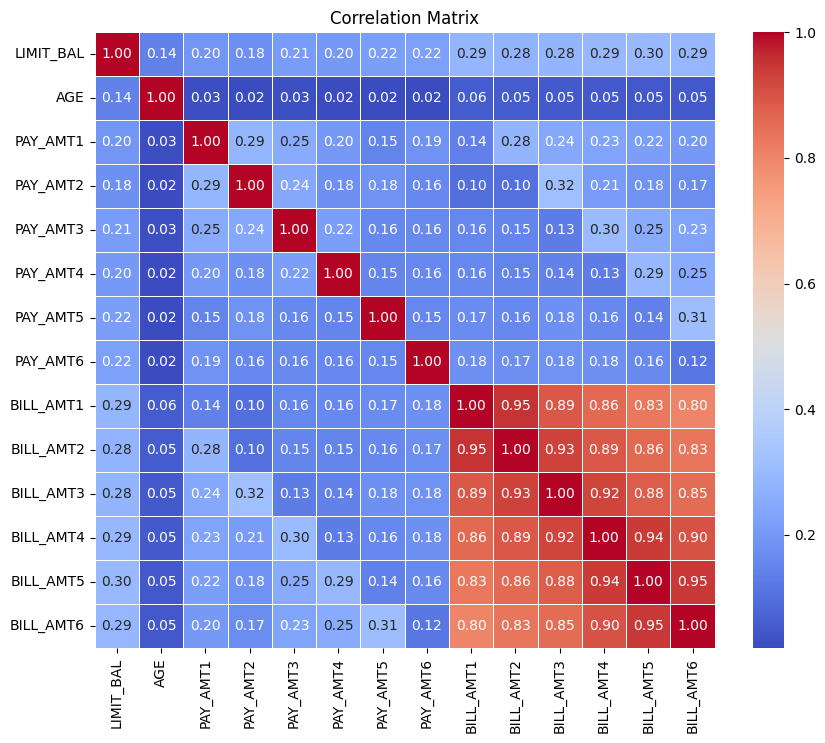

In [ ]:
correlation_matrix = credit_card_original_df[['LIMIT_BAL','AGE','PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].corr()

# Cria um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## 2.3 Understanding the classes

### 2.3.1 Target

In [ ]:
# Understanding the target column
credit_card_original_df['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [ ]:
# Having a general idea of the default probability
print('Defaults represent', credit_card_original_df['default.payment.next.month'].sum() / len(credit_card_original_df['default.payment.next.month']), ' of the data')

Defaults represent 0.2212  of the data


Observation:
- The classes are imbalanced

### 2.3.2 Categorical Variables

---------------------


1    11888
2    18112
Name: SEX, dtype: int64

---------------------


0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

---------------------


0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

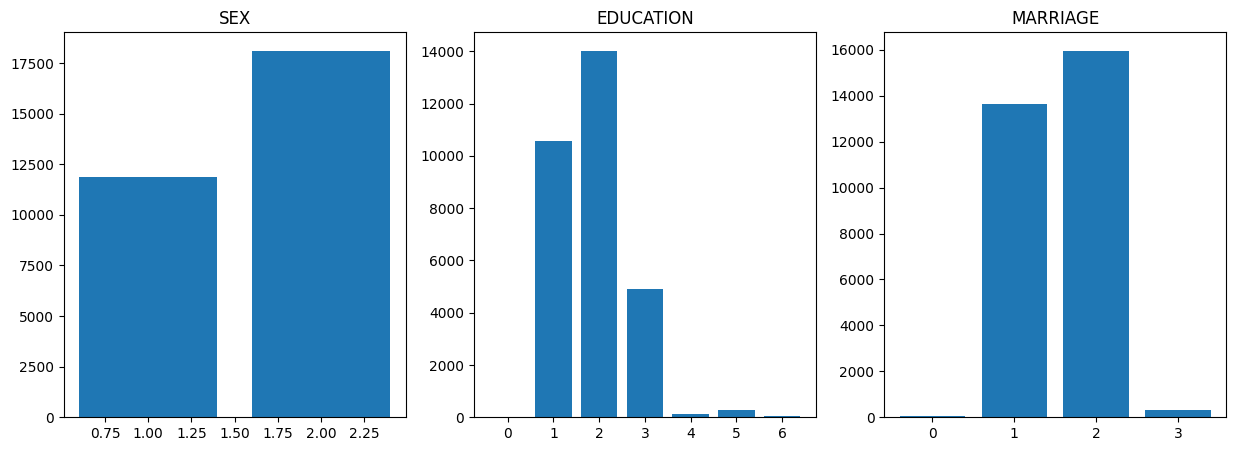

In [ ]:
# Understanding the classes of the columns SEX, EDUCATION and MARRIAGE
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, categoric in enumerate(['SEX', 'EDUCATION', 'MARRIAGE']):
    classes = credit_card_original_df[categoric].value_counts().sort_index()

    print('---------------------')
    display(classes)

    axes[i].bar(classes.index, classes)
    axes[i].set_title(categoric)

plt.show()

### 2.3.3 Numerical Variables

In [ ]:
def plot_histograms(df, variables, n_rows, n_cols, n_bins):
    """
    plot_histograms(df, variables, n_rows, n_cols, n_bins)

    Plots histograms for selected variables in a DataFrame.

    Keyword arguments:
    df -- The DataFrame containing the variables.
    variables -- List of variable names to plot.
    n_rows -- Number of rows for subplots.
    n_cols -- Number of columns for subplots.
    n_bins -- Number of bins for the histograms.
    """
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

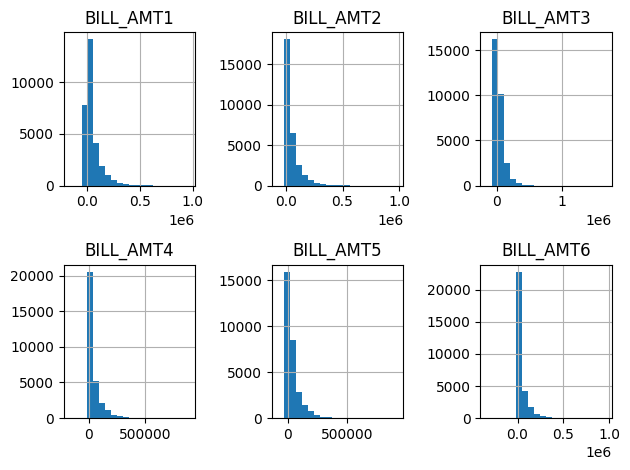

In [ ]:
bills = credit_card_original_df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
plot_histograms(bills, bills.columns, 2, 3, 20)

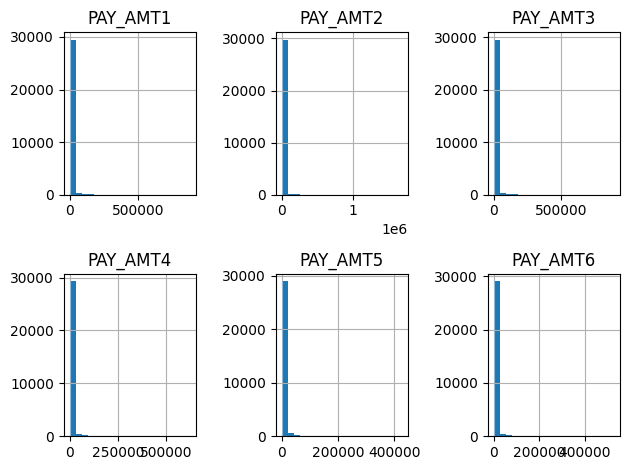

In [ ]:
pay = credit_card_original_df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
plot_histograms(pay, pay.columns, 2, 3, 20)

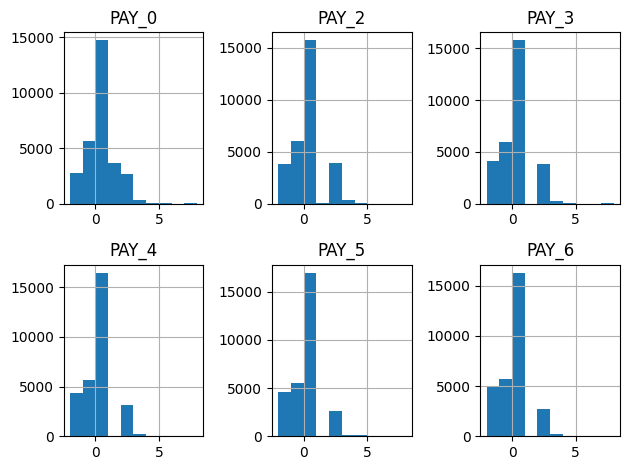

In [ ]:
late = credit_card_original_df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
plot_histograms(late, late.columns, 2, 3, 10)

In [ ]:
credit_card_original_df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


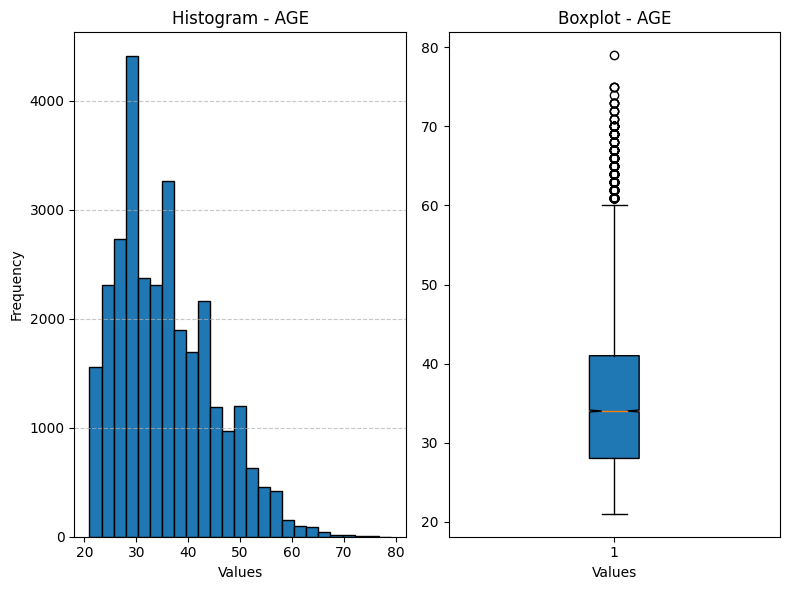

In [ ]:
# subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))

# First subplot - Histogram
axes[0].hist(credit_card_original_df['AGE'], bins=25, edgecolor='black')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].set_title('Histogram - AGE')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')

# Second subplot - Boxplot
axes[1].boxplot(credit_card_original_df['AGE'], notch=True, patch_artist=True)
axes[1].set_title('Boxplot - AGE')
axes[1].set_xlabel('Values')

# Layout
plt.tight_layout()
plt.show()

Observations:
- The public is concentrated between 25 and 45 years old

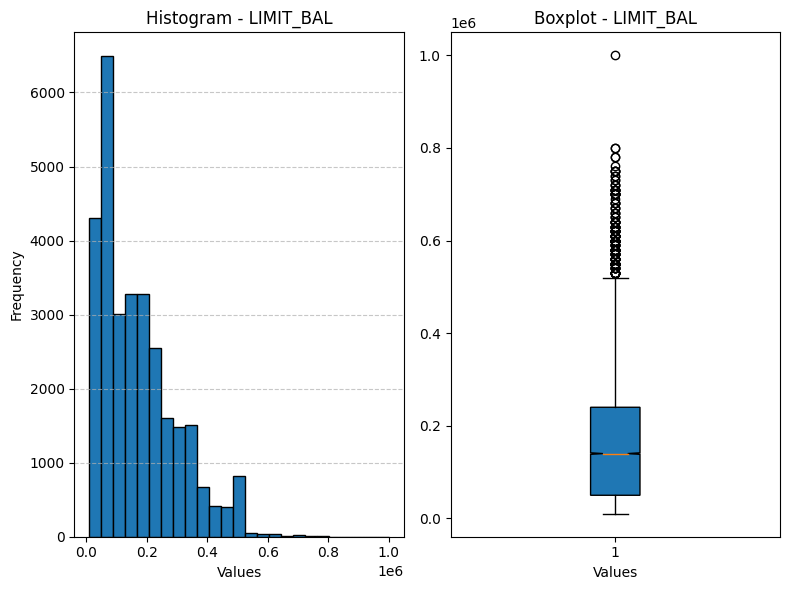

In [ ]:
# Subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))

# First subplot - Histogram
axes[0].hist(credit_card_original_df['LIMIT_BAL'], bins=25, edgecolor='black')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].set_title('Histogram - LIMIT_BAL')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')

# Second subplot - Boxplot
axes[1].boxplot(credit_card_original_df['LIMIT_BAL'], notch=True, patch_artist=True)
axes[1].set_title('Boxplot - LIMIT_BAL')
axes[1].set_xlabel('Values')

# Layout
plt.tight_layout()
plt.show()

# 3. Data Cleaning

In [ ]:
# Renamed some columns
credit_card_df_cleaning = credit_card_original_df.rename(columns={'default.payment.next.month': 'def_payment',
                        'PAY_0': 'PAY_1'})

In [ ]:
# The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can be put in 4 (Other)
print('credit_card_original_df:')
display(credit_card_original_df.EDUCATION.value_counts().sort_index())

print('credit_card_df_cleaning:')
education_replace = {0: 4, 5: 4, 6: 4}
credit_card_df_cleaning['EDUCATION'].replace(education_replace, inplace=True)
display(credit_card_df_cleaning.EDUCATION.value_counts().sort_index())

credit_card_original_df:


0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

credit_card_df_cleaning:


1    10585
2    14030
3     4917
4      468
Name: EDUCATION, dtype: int64

In [ ]:
# The 0 in MARRIAGE was categorized as 3 (Other)
print('credit_card_original_df:')
display(credit_card_original_df.MARRIAGE.value_counts().sort_index())

print('credit_card_df_cleaning:')
credit_card_df_cleaning['MARRIAGE'] = credit_card_df_cleaning['MARRIAGE'].replace(0, 3)
display(credit_card_df_cleaning.MARRIAGE.value_counts().sort_index())

credit_card_original_df:


0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

credit_card_df_cleaning:


1    13659
2    15964
3      377
Name: MARRIAGE, dtype: int64

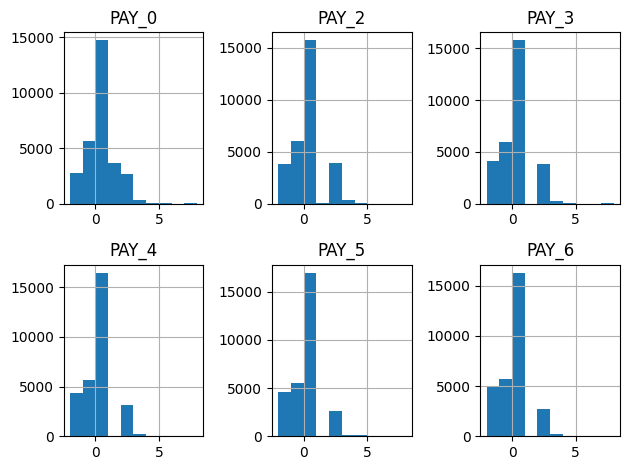

In [ ]:
# There are many instances of labels -1 and -2, but it is not clear what these labels mean
late = credit_card_original_df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
plot_histograms(late, late.columns, 2, 3, 10)

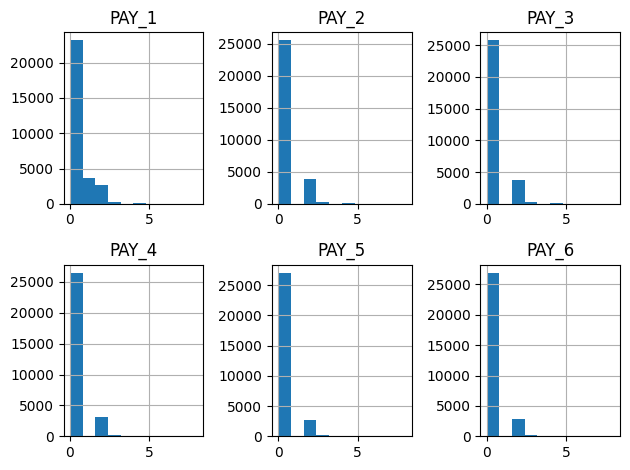

In [ ]:
# The labels -1 and -2 were adjusted to 0 for 'pay duly'
columns = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

for col in columns:
    credit_card_df_cleaning[col] = credit_card_df_cleaning[col].apply(lambda x: 0 if x in [-2, -1, 0] else x)

late = credit_card_df_cleaning[columns]
plot_histograms(late, late.columns, 2, 3, 10)

One specific case

In [ ]:
credit_card_df_cleaning.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'def_payment'],
      dtype='object')

In [ ]:
credit_card_df_cleaning[credit_card_df_cleaning['ID']==12331][['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
12330,12331,300000.0,1,2,1,37


In [ ]:
credit_card_df_cleaning[credit_card_df_cleaning['ID']==12331][['ID', 'LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

,ID,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
12330,12331,300000.0,-165580.0,324392.0,296931.0,30355.0,26771.0,23737.0


In [ ]:
credit_card_df_cleaning[credit_card_df_cleaning['ID']==12331][['ID', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'def_payment']]

,ID,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_payment
12330,12331,1,0,2,0,0,0,505000.0,331.0,1070.0,17771.0,18000.0,16079.0,0


looking for outliers

In [ ]:
credit_card_df_cleaning[credit_card_df_cleaning.PAY_AMT1 > 400000][['LIMIT_BAL', 'PAY_1', 'PAY_2', 'BILL_AMT2',
                          'PAY_AMT1', 'BILL_AMT1', 'def_payment']]

,LIMIT_BAL,PAY_1,PAY_2,BILL_AMT2,PAY_AMT1,BILL_AMT1,def_payment
8500,400000.0,0,0,405016.0,405016.0,6500.0,0
12330,300000.0,1,0,324392.0,505000.0,-165580.0,0
28003,510000.0,0,0,481382.0,493358.0,71121.0,0
28716,340000.0,0,0,176743.0,873552.0,139808.0,0
29820,400000.0,1,0,394858.0,423903.0,396343.0,0


In [ ]:
credit_card_df_cleaning[credit_card_df_cleaning.PAY_AMT2 > 400000][['LIMIT_BAL', 'PAY_2', 'PAY_3', 'BILL_AMT3',
                          'PAY_AMT2', 'BILL_AMT2', 'def_payment']]

,LIMIT_BAL,PAY_2,PAY_3,BILL_AMT3,PAY_AMT2,BILL_AMT2,def_payment
5296,500000.0,0,0,1664089.0,1684259.0,-18088.0,0
13186,750000.0,0,0,401003.0,401003.0,9655.0,0
13863,520000.0,0,0,385425.0,415552.0,2728.0,0
14513,460000.0,0,0,309622.0,580464.0,261444.0,0
25731,80000.0,0,0,855086.0,1024516.0,-215.0,0
28003,510000.0,0,0,559712.0,1227082.0,481382.0,0
28716,340000.0,0,0,34402.0,1215471.0,176743.0,0


# 4. Analysis by classes and default

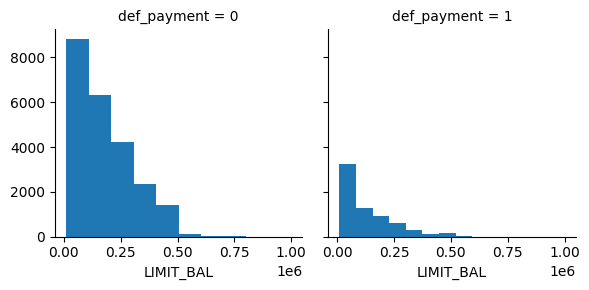

In [ ]:
g = sns.FacetGrid(credit_card_df_cleaning, col = 'def_payment')
g.map(plt.hist, 'LIMIT_BAL')

## 4.2 Categorical classes and default

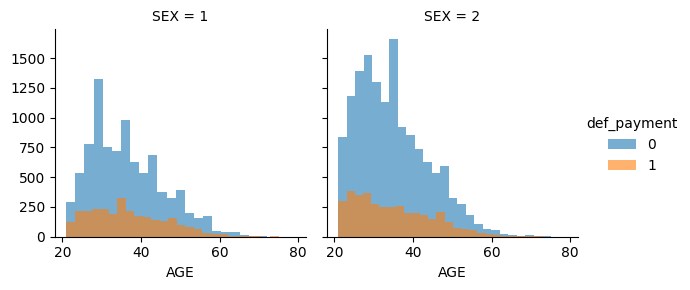

In [ ]:
g = sns.FacetGrid(credit_card_df_cleaning, col='SEX', hue='def_payment')
g.map(plt.hist, 'AGE', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()

# LEGEND --> SEX (1=male, 2=female)
#            Default payment (1=yes, 0=no)

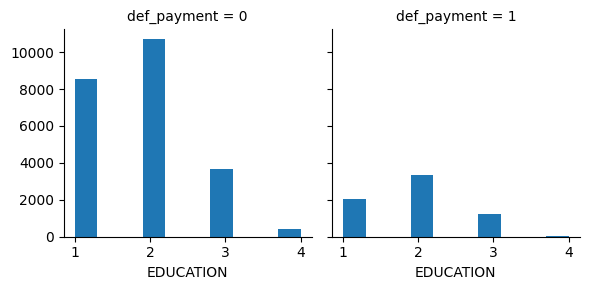

In [ ]:
g = sns.FacetGrid(credit_card_df_cleaning, col = 'def_payment')
g.map(plt.hist, 'EDUCATION')

# LEGEND--> 1=graduate school, 2=university, 3=high school, 4=others and unknown (5,6)
#            Default payment (1=yes, 0=no)

1    10585
2    14030
3     4917
4      468
Name: EDUCATION, dtype: int64

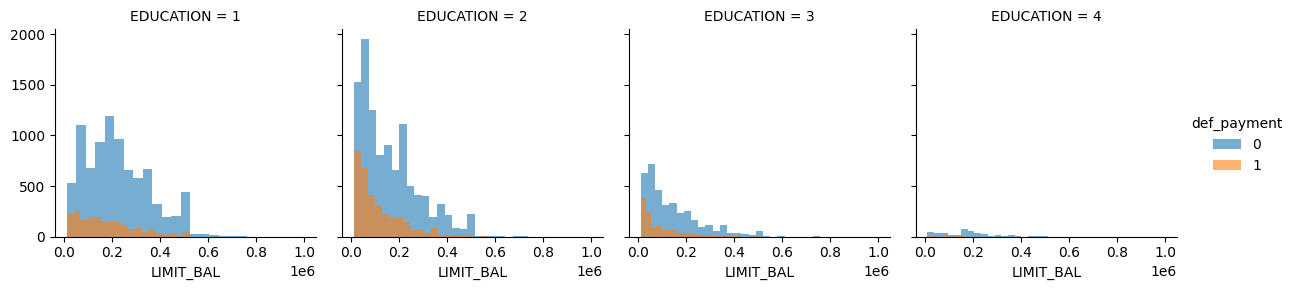

In [ ]:
g = sns.FacetGrid(credit_card_df_cleaning, col='EDUCATION', hue='def_payment')
g.map(plt.hist, 'LIMIT_BAL', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()
credit_card_df_cleaning.EDUCATION.value_counts().sort_index()

# LEGEND--> 1=graduate school, 2=university, 3=high school, 4=others and unknown (5,6)
#            Default payment (1=yes, 0=no)

Observation:
- The LIMIT_BAL amount and education level have no influence on default

1    13659
2    15964
3      377
Name: MARRIAGE, dtype: int64

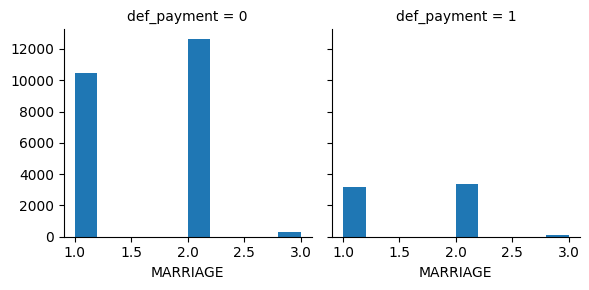

In [ ]:
g = sns.FacetGrid(credit_card_df_cleaning, col = 'def_payment')
g.map(plt.hist, 'MARRIAGE')
credit_card_df_cleaning.MARRIAGE.value_counts().sort_index()
#Marital status (1=married, 2=single, 3=others)
#            Default payment (1=yes, 0=no)

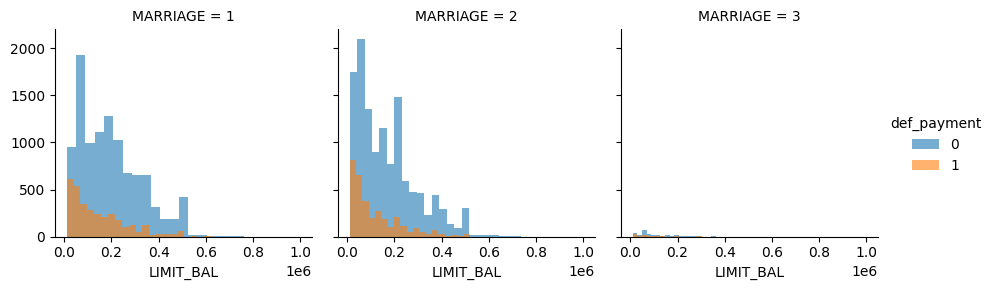

In [ ]:
g = sns.FacetGrid(credit_card_df_cleaning, col='MARRIAGE', hue='def_payment')
g.map(plt.hist, 'LIMIT_BAL', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()
#Marital status (1=married, 2=single, 3=others)
#            Default payment (1=yes, 0=no)

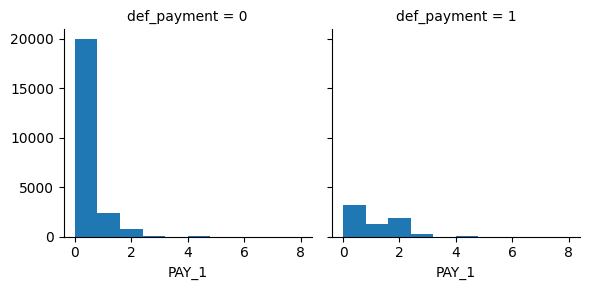

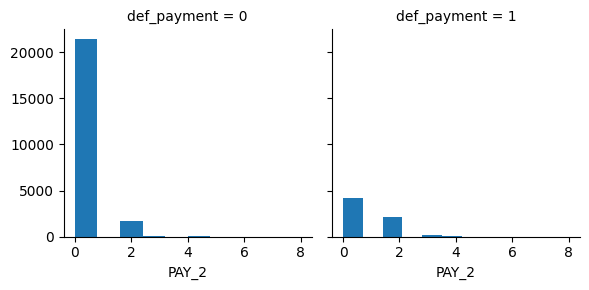

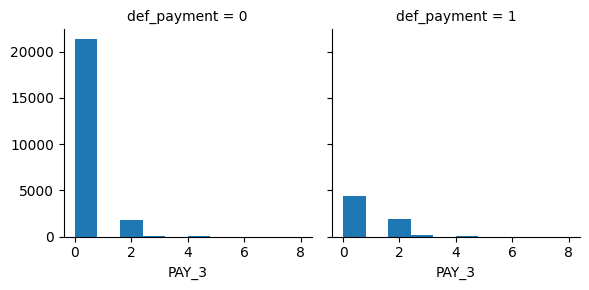

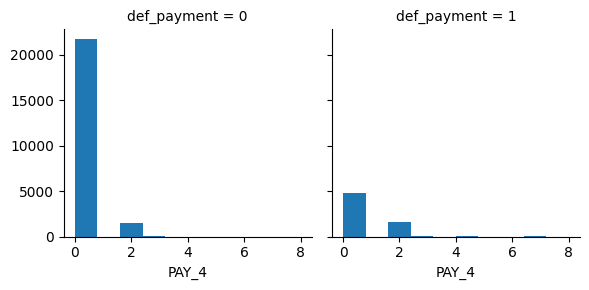

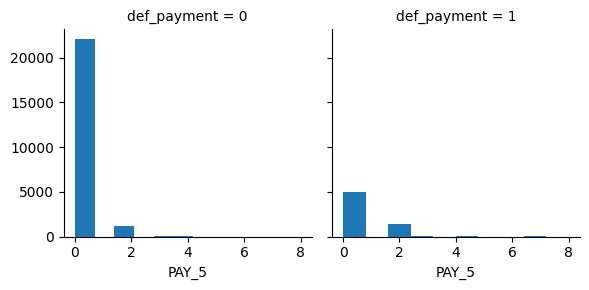

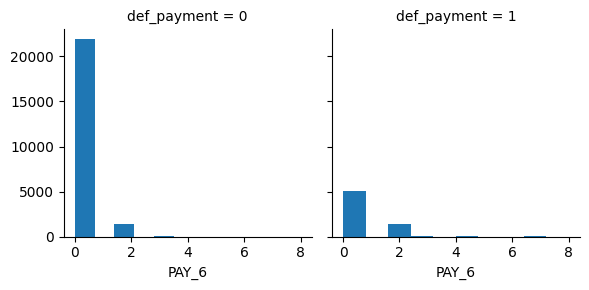

In [ ]:
payment_columns = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

for pay in payment_columns:
  g = sns.FacetGrid(credit_card_df_cleaning, col = 'def_payment')
  g.map(plt.hist, pay)

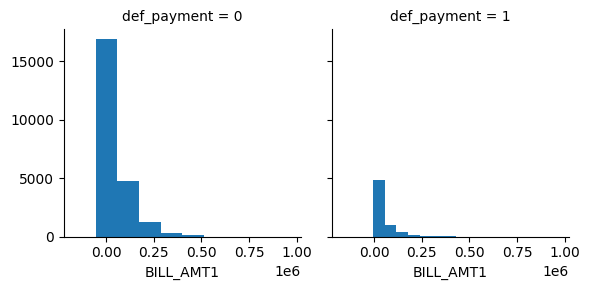

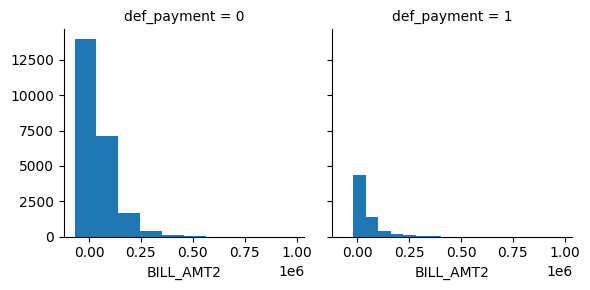

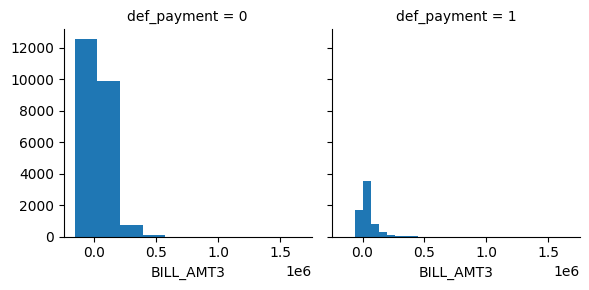

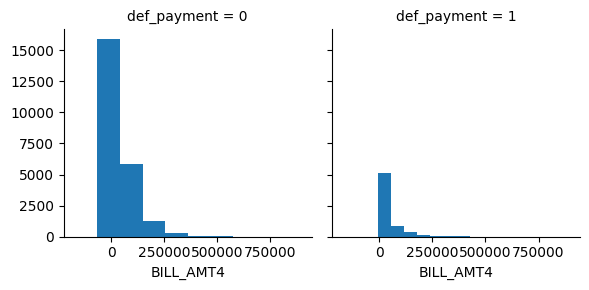

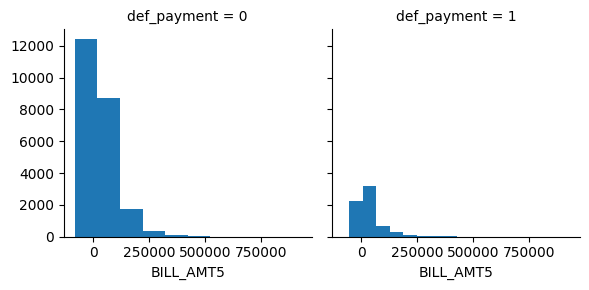

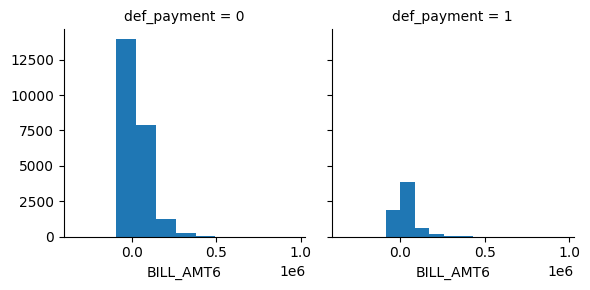

In [ ]:
bill_columns = ['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

for pay in bill_columns:
  g = sns.FacetGrid(credit_card_df_cleaning, col = 'def_payment')
  g.map(plt.hist, pay)

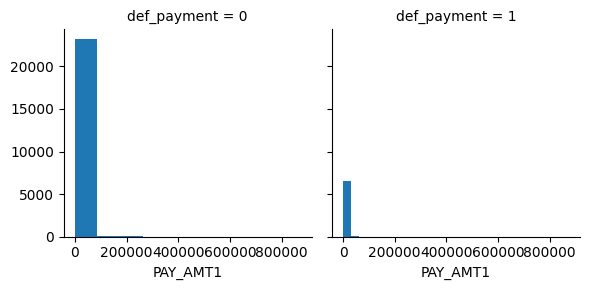

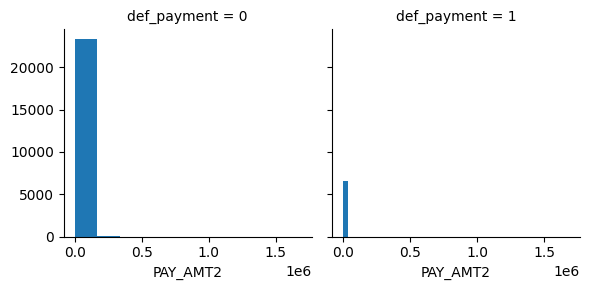

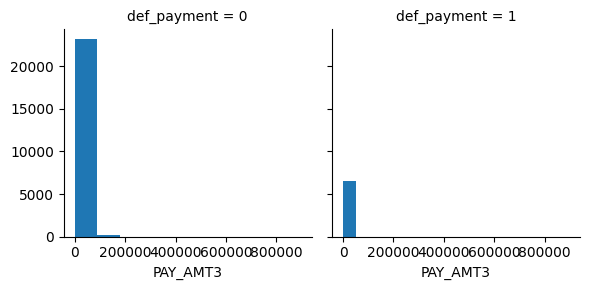

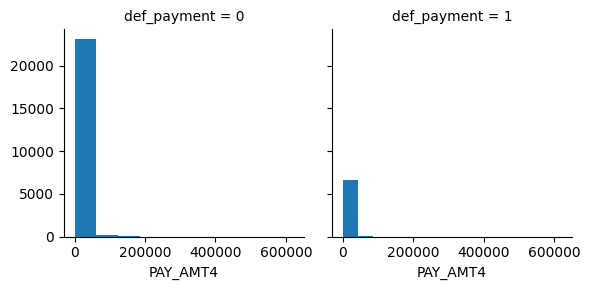

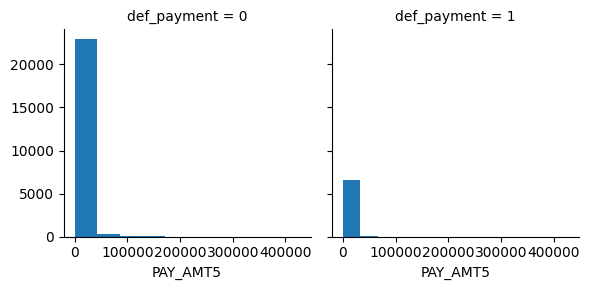

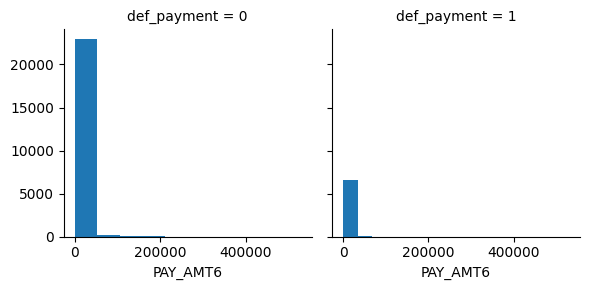

In [ ]:
payamt_columns = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

for pay in payamt_columns:
  g = sns.FacetGrid(credit_card_df_cleaning, col = 'def_payment')
  g.map(plt.hist, pay)

# 5. Predicting Credit Card Default with XGBoost algorithm

```
```



## 5.1 Feature Extraction

In [ ]:
credit_card_df_cleaning.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_payment
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
credit_card_df_extracting = credit_card_df_cleaning.copy()
# Function to extract statisticals historic
def extract_stats(data, prefix):
    data_mean = data.filter(like=prefix).mean(axis=1)
    data_max = data.filter(like=prefix).max(axis=1)
    data_min = data.filter(like=prefix).min(axis=1)
    return data_mean, data_max, data_min

In [ ]:
# Feature extraction: Statistical extract for PAY_X, BILL, PAY_AMTX
pay_mean, pay_max, pay_min = extract_stats(credit_card_df_extracting, 'PAY_')
bill_mean, bill_max, bill_min = extract_stats(credit_card_df_extracting, 'BILL_AMT')
pay_amt_mean, pay_amt_max, pay_amt_min = extract_stats(credit_card_df_extracting, 'PAY_AMT')

# adding statistics on dataframe
credit_card_df_extracting['PAY_mean'] = pay_mean
credit_card_df_extracting['PAY_max'] = pay_max
credit_card_df_extracting['PAY_min'] = pay_min
credit_card_df_extracting['BILL_mean'] = bill_mean
credit_card_df_extracting['BILL_max'] = bill_max
credit_card_df_extracting['BILL_min'] = bill_min
credit_card_df_extracting['PAY_AMT_mean'] = pay_amt_mean
credit_card_df_extracting['PAY_AMT_max'] = pay_amt_max
credit_card_df_extracting['PAY_AMT_min'] = pay_amt_min

# Feature extraction: New columns to represent the range of the PAY, BILL, and PAY_AMT
credit_card_df_extracting['PAY_range'] = credit_card_df_extracting['PAY_max'] - credit_card_df_extracting['PAY_min']
credit_card_df_extracting['BILL_range'] = credit_card_df_extracting['BILL_max'] - credit_card_df_extracting['BILL_min']
credit_card_df_extracting['PAY_AMT_range'] = credit_card_df_extracting['PAY_AMT_max'] - credit_card_df_extracting['PAY_AMT_min']

# Feature extraction: Removing the column 'SEX'
credit_card_df_extracting.drop('SEX', axis=1, inplace=True)

# Feature extraction: Appliyng One-Hot Encoding on categorical variables
credit_card_df_extracting = pd.get_dummies(credit_card_df_extracting, columns=['EDUCATION', 'MARRIAGE'], drop_first=True)

In [ ]:
credit_card_df_extracting

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT_max,PAY_AMT_min,PAY_range,BILL_range,PAY_AMT_range,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3
0,1,20000.0,24,2,2,0,0,0,0,3913.0,...,689.0,0.0,689.0,3913.0,689.0,1,0,0,0,0
1,2,120000.0,26,0,2,0,0,0,2,2682.0,...,2000.0,0.0,2000.0,1730.0,2000.0,1,0,0,1,0
2,3,90000.0,34,0,0,0,0,0,0,29239.0,...,5000.0,1000.0,5000.0,15680.0,4000.0,1,0,0,1,0
3,4,50000.0,37,0,0,0,0,0,0,46990.0,...,2019.0,1000.0,2019.0,20977.0,1019.0,1,0,0,0,0
4,5,50000.0,57,0,0,0,0,0,0,8617.0,...,36681.0,679.0,36681.0,30165.0,36002.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,39,0,0,0,0,0,0,188948.0,...,20000.0,1000.0,20000.0,192385.0,19000.0,0,1,0,0,0
29996,29997,150000.0,43,0,0,0,0,0,0,1683.0,...,8998.0,0.0,8998.0,8979.0,8998.0,0,1,0,1,0
29997,29998,30000.0,37,4,3,2,0,0,0,3565.0,...,22000.0,0.0,22000.0,18120.0,22000.0,1,0,0,1,0
29998,29999,80000.0,41,1,0,0,0,0,0,-1645.0,...,85900.0,1178.0,85900.0,80024.0,84722.0,0,1,0,0,0


## 5.2 Predict with original features

In [ ]:
results = pd.DataFrame(columns=['technique','dataframe','brier_score', 'ks_test', 'roc_auc'])

In [ ]:
credit_card_df_cleaning

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_payment
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,0,0,0,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [ ]:
# Load the dataframe
df = credit_card_df_cleaning.copy()

# Define metric
scoring = 'roc_auc'

# Splitting the dataset into features (X) and target variable (y)
X = df.drop(columns=['ID','def_payment'], axis=1)
y = df['def_payment']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the pipeline with feature scaling
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Add other preprocessing steps as needed
    ('model', xgb.XGBClassifier(objective='binary:logistic', random_state=42))
])

pipeline.fit(X_train, y_train)

probabilities = pipeline.predict_proba(X_test)

brier = brier_score_loss(y_test,probabilities[:,1])

roc_auc = roc_auc_score(y_true=y_test,y_score=probabilities[:,1])

# Assuming y_true contains true labels (0 or 1) and y_pred_proba contains predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])

# Calculate KS statistic
ks_statistic = max(tpr - fpr)

RocCurveDisplay.from_predictions(y_test,probabilities[:,1])

results = results.append({'technique': 'pipeline' ,'dataframe': 'credit_card_df_cleaning', 'brier_score': brier, 'ks_test': ks_statistic, 'roc_auc':roc_auc}, ignore_index=True)
display(results)

## 5.3 Predict with all the features (originals + extracted)

In [ ]:
# Load the dataframe
df = credit_card_df_extracting.copy()

# Define metric
scoring = 'roc_auc'

# Splitting the dataset into features (X) and target variable (y)
X = df.drop(columns=['ID','def_payment'], axis=1)
y = df['def_payment']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the pipeline with feature scaling
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Add other preprocessing steps as needed
    ('model', xgb.XGBClassifier(objective='binary:logistic', random_state=42))
])

pipeline.fit(X_train, y_train)

probabilities = pipeline.predict_proba(X_test)

from sklearn.metrics import brier_score_loss, roc_auc_score, RocCurveDisplay, roc_curve

brier = brier_score_loss(y_test,probabilities[:,1])

roc_auc = roc_auc_score(y_true=y_test,y_score=probabilities[:,1])

# Assuming y_true contains true labels (0 or 1) and y_pred_proba contains predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])

# Calculate KS statistic
ks_statistic = max(tpr - fpr)

RocCurveDisplay.from_predictions(y_test,probabilities[:,1])

results = results.append({'technique': 'pipeline' ,'dataframe': 'credit_card_df_extracting', 'brier_score': brier, 'ks_test': ks_statistic, 'roc_auc':roc_auc}, ignore_index=True)
display(results)

## 5.4 Predict with Feature Selection - RFE_CV (metric: ks_scorer)

In [ ]:
def ks_stat(y, yhat):
  fpr, tpr, thresholds = roc_curve(y, yhat)
  ks_statistic = max(tpr - fpr)
  return ks_statistic

ks_scorer = make_scorer(ks_stat, needs_proba=True)

In [ ]:
# Load the dataframe
df = credit_card_df_extracting.copy()

# Define metric
metric = 'ks_scorer'
scoring = ks_scorer

# Splitting the dataset into features (X) and target variable (y)
X = df.drop(columns=['ID','def_payment'], axis=1)
y = df['def_payment']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the pipeline with feature scaling
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Add other preprocessing steps as needed
    ('model', xgb.XGBClassifier(objective='binary:logistic', random_state=42))
])

# Initializing RFECV with 5-fold cross-validation
rfecv = RFECV(estimator=pipeline,
              cv=5,
              scoring= scoring,
              importance_getter='named_steps.model.feature_importances_',
              min_features_to_select=10)

# Fitting RFECV on the training data
rfecv.fit(X_train, y_train)

RFECV(cv=5,
      estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                ('model',
                                 XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None,
                                               feature_types=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               in...
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=None, n_jobs=None,
                                               num_parallel_tree=None,
                                               random_state=42, ...))]),
      importance_getter='named_steps.model.feature_importances_',
      min_features_to_select=10,
      scoring=make_scorer(ks_stat, needs_proba=True))

N de features 10
n_total_scores: 28


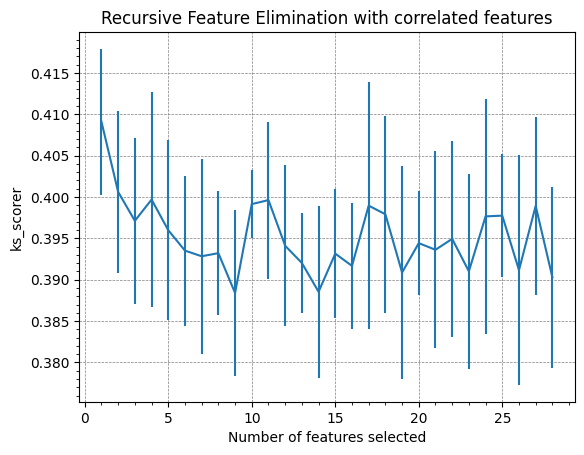

In [ ]:
xb = rfecv.estimator_.named_steps.model
feature_importances = xb.feature_importances_

print('N de features',len(feature_importances))

df_selected = X_train.loc[:,rfecv.support_]
#df_selected = df.drop(columns=['vazao','id_df_linha']).loc[:,rfecv.support_]

df_feature_importances = pd.DataFrame()
df_feature_importances['feature'] = df_selected.columns
df_feature_importances['feature_importance'] = feature_importances.ravel()
df_feature_importances_ordenado = df_feature_importances.sort_values(by='feature_importance',ascending=False).iloc[:22]
#df_feature_importances_ordenado['idx'] = range(22)
df_feature_importances_ordenado = df_feature_importances_ordenado.reset_index()

##################
## Geração dos gráficos
##################
n_scores = len(rfecv.cv_results_["mean_test_score"])
print('n_total_scores:', n_scores)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel(f'{metric}')
plt.errorbar(
    range(1, n_scores + 1),  # Mudei o range para começar de 1, pois os índices começam em 1
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination with correlated features")
# Ative as grades menores
plt.minorticks_on()
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.show()

In [ ]:
df_feature_importances_ordenado

,index,feature,feature_importance
0,0,PAY_1,0.549788
1,1,PAY_2,0.128556
2,9,EDUCATION_4,0.056087
3,3,PAY_4,0.051716
4,2,PAY_3,0.048232
5,4,PAY_5,0.037557
6,5,PAY_6,0.036112
7,6,PAY_AMT_mean,0.031763
8,7,PAY_AMT_min,0.030538
9,8,BILL_range,0.029651


In [ ]:
X_train_selected = rfecv.transform(X_train)
X_test_selected = rfecv.transform(X_test)

# Treine o modelo no conjunto de dados com features selecionadas
pipeline.fit(X_train_selected, y_train)

# Faça previsões de probabilidade no conjunto de teste
probabilities = pipeline.predict_proba(X_test_selected)
probabilities

array([[0.87113035, 0.12886964],
       [0.8165292 , 0.1834708 ],
       [0.74193007, 0.25806993],
       ...,
       [0.79167616, 0.2083238 ],
       [0.8204762 , 0.1795238 ],
       [0.95748746, 0.04251255]], dtype=float32)

,technique,dataframe,brier_score,ks_test,roc_auc
0,pipeline,credit_card_df_cleaning,0.138515,0.407908,0.769338
1,pipeline,credit_card_df_extracting,0.139368,0.396976,0.767222
2,RFE_CV_metric_ks_scorer,credit_card_df_extracting,0.139988,0.398819,0.754164


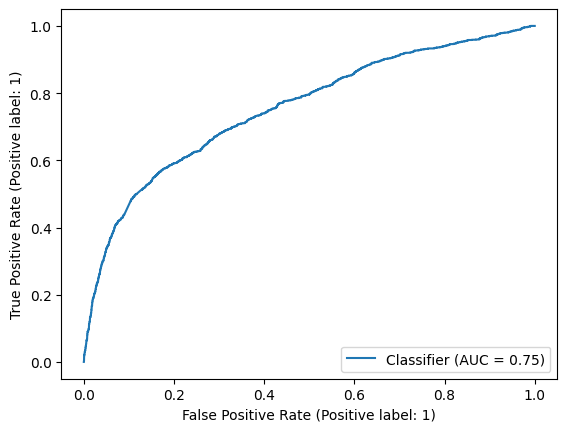

In [ ]:
brier = brier_score_loss(y_test,probabilities[:,1])

roc_auc = roc_auc_score(y_true=y_test,y_score=probabilities[:,1])

# Assuming y_true contains true labels (0 or 1) and y_pred_proba contains predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])

# Calculate KS statistic
ks_statistic = max(tpr - fpr)

RocCurveDisplay.from_predictions(y_test,probabilities[:,1])

results = results.append({'technique': f'RFE_CV_metric_{metric}' ,'dataframe': 'credit_card_df_extracting', 'brier_score': brier, 'ks_test': ks_statistic, 'roc_auc':roc_auc}, ignore_index=True)
display(results)

In [ ]:
final_probs = probabilities[:,1]
final_df = X_test.copy()
final_df['prob'] = final_probs
final_df['def_payment'] = y_test

final_df

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_range,BILL_range,PAY_AMT_range,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,prob,def_payment
2308,30000.0,25,0,0,0,0,0,0,8864.0,10062.0,...,2000.0,5964.0,500.0,1,0,0,1,0,0.128870,0
22404,150000.0,26,0,0,0,0,0,0,136736.0,125651.0,...,4486.0,59472.0,1839.0,0,0,0,1,0,0.183471,0
23397,70000.0,32,0,0,0,0,0,0,70122.0,69080.0,...,3112.0,1682.0,681.0,0,1,0,0,0,0.258070,0
25058,130000.0,49,0,0,0,0,0,0,20678.0,18956.0,...,7014.0,13734.0,6987.0,0,1,0,1,0,0.051262,0
2664,50000.0,36,0,0,0,0,0,2,94228.0,47635.0,...,2000.0,74789.0,2000.0,1,0,0,1,0,0.050683,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,360000.0,27,1,0,0,0,0,0,0.0,0.0,...,1970.0,1271.0,1970.0,0,0,0,1,0,0.179342,0
14144,500000.0,28,2,0,0,2,0,0,98541.0,102052.0,...,13151.0,33620.0,13151.0,0,0,0,1,0,0.591566,1
23108,60000.0,28,0,0,0,0,0,2,46233.0,47263.0,...,2500.0,6428.0,1000.0,0,0,0,0,0,0.208324,0
25703,20000.0,29,1,0,0,0,0,0,0.0,2494.0,...,3967.0,3967.0,3967.0,0,0,0,1,0,0.179524,0


In [ ]:
final_df[['def_payment','prob']].head(30)

,def_payment,prob
2308,0,0.128870
22404,0,0.183471
23397,0,0.258070
25058,0,0.051262
2664,1,0.050683
8511,0,0.091457
5148,1,0.443350
7790,0,0.378763
11311,0,0.067715
19043,0,0.130351


<Axes: >

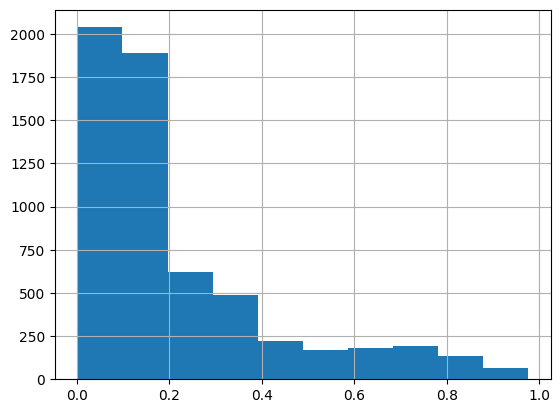

In [ ]:
final_df['prob'].hist()

## 5.5 Predict with Hyperparameter Optimization

In [ ]:
learning_rate_range = [0.001, 0.01, 0.1]
max_depth_range = [4, 6, 8]
max_leaves_range = [10, 20, 30]
max_bins_range = [128, 256, 512]

param_dict = {
    'model__learning_rate':learning_rate_range,
    'model__max_depth': max_depth_range,
    'model__max_leaves': max_leaves_range,
    'model__max_bins':max_bins_range,
}

GSCV = GridSearchCV(estimator=pipeline,
                    param_grid=param_dict,
                    scoring=ks_scorer)

GSCV.fit(X_train_selected,y_train)
GSCV

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=None,...
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             param_grid={'model__learning_rate': [0.001, 0.01, 0.1],
                         'model__max_bins': [128, 256, 512],
                         'model__max_depth': [4, 6, 8],
                         'model__max_leaves': [10, 20, 30]},
             scoring=make_scorer(ks_stat, needs_proba=True))

In [ ]:
GSCV.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_bins=128,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=6, max_leaves=20,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [ ]:
# previsões de probabilidade no conjunto de teste
final_probabilities = GSCV.predict_proba(X_test_selected)
final_probabilities

array([[0.9013936 , 0.09860642],
       [0.89844143, 0.10155857],
       [0.9174586 , 0.08254143],
       ...,
       [0.829608  , 0.17039198],
       [0.7944193 , 0.20558073],
       [0.9117587 , 0.08824126]], dtype=float32)

,technique,dataframe,brier_score,ks_test,roc_auc
0,pipeline,credit_card_df_cleaning,0.138515,0.407908,0.769338
1,pipeline,credit_card_df_extracting,0.139368,0.396976,0.767222
2,RFE_CV_metric_ks_scorer,credit_card_df_extracting,0.139988,0.398819,0.754164
3,hp_optimization_metric_ks_scorer,credit_card_df_extracting,0.135710,0.415082,0.769167


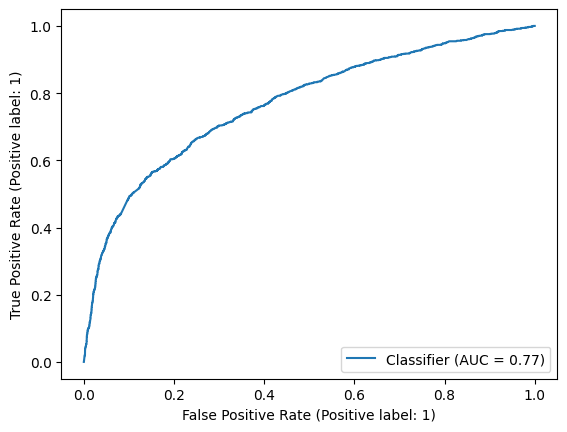

In [ ]:
brier = brier_score_loss(y_test,final_probabilities[:,1])

roc_auc = roc_auc_score(y_true=y_test,y_score=final_probabilities[:,1])

# Assuming y_true contains true labels (0 or 1) and y_pred_proba contains predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, final_probabilities[:,1])

# Calculate KS statistic
ks_statistic = max(tpr - fpr)

RocCurveDisplay.from_predictions(y_test,final_probabilities[:,1])

results = results.append({'technique': f'hp_optimization_metric_{metric}' ,'dataframe': 'credit_card_df_extracting', 'brier_score': brier, 'ks_test': ks_statistic, 'roc_auc':roc_auc}, ignore_index=True)
display(results)

In [ ]:
final_actual_probs = final_probabilities[:,1]
final_actual_df = X_test.copy()
final_actual_df['prob'] = final_actual_probs
final_actual_df['def_payment'] = y_test

final_actual_df

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_range,BILL_range,PAY_AMT_range,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,prob,def_payment
2308,30000.0,25,0,0,0,0,0,0,8864.0,10062.0,...,2000.0,5964.0,500.0,1,0,0,1,0,0.098606,0
22404,150000.0,26,0,0,0,0,0,0,136736.0,125651.0,...,4486.0,59472.0,1839.0,0,0,0,1,0,0.101559,0
23397,70000.0,32,0,0,0,0,0,0,70122.0,69080.0,...,3112.0,1682.0,681.0,0,1,0,0,0,0.082541,0
25058,130000.0,49,0,0,0,0,0,0,20678.0,18956.0,...,7014.0,13734.0,6987.0,0,1,0,1,0,0.090647,0
2664,50000.0,36,0,0,0,0,0,2,94228.0,47635.0,...,2000.0,74789.0,2000.0,1,0,0,1,0,0.141074,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,360000.0,27,1,0,0,0,0,0,0.0,0.0,...,1970.0,1271.0,1970.0,0,0,0,1,0,0.214875,0
14144,500000.0,28,2,0,0,2,0,0,98541.0,102052.0,...,13151.0,33620.0,13151.0,0,0,0,1,0,0.647060,1
23108,60000.0,28,0,0,0,0,0,2,46233.0,47263.0,...,2500.0,6428.0,1000.0,0,0,0,0,0,0.170392,0
25703,20000.0,29,1,0,0,0,0,0,0.0,2494.0,...,3967.0,3967.0,3967.0,0,0,0,1,0,0.205581,0


In [ ]:
final_actual_df[['def_payment','prob']].head(30)

,def_payment,prob
2308,0,0.098606
22404,0,0.101559
23397,0,0.082541
25058,0,0.090647
2664,1,0.141074
8511,0,0.114024
5148,1,0.391670
7790,0,0.371097
11311,0,0.095232
19043,0,0.132535


<Axes: >

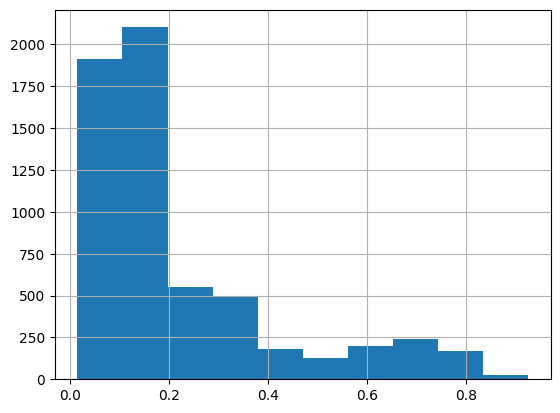

In [ ]:
final_actual_df['prob'].hist()

## 5.6 Predict with Feature Selection - RFE_CV (metric: roc_auc_scorer)

In [ ]:
# Load the dataframe
df = credit_card_df_extracting.copy()

# Define metric
metric = 'roc_auc'
roc_auc_scorer = make_scorer(roc_auc_score)
scoring = roc_auc_scorer

# Splitting the dataset into features (X) and target variable (y)
X = df.drop(columns=['ID','def_payment'], axis=1)
y = df['def_payment']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the pipeline with feature scaling
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Add other preprocessing steps as needed
    ('model', xgb.XGBClassifier(objective='binary:logistic', random_state=42))
])

# Initializing RFECV with 5-fold cross-validation
rfecv = RFECV(estimator=pipeline,
              cv=5,
              scoring= scoring,
              importance_getter='named_steps.model.feature_importances_',
              min_features_to_select=10)

# Fitting RFECV on the training data
rfecv.fit(X_train, y_train)

RFECV(cv=5,
      estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                ('model',
                                 XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None,
                                               feature_types=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               in...
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=None, n_jobs=None,
                                               num_parallel_tree=None,
                                               random_state=42, ...))]),
      importance_getter='named_steps.model.feature_importances_',
      min_features_to_select=10, scoring=make_scorer(roc_auc_score))

N de features 34
n_total_scores: 28


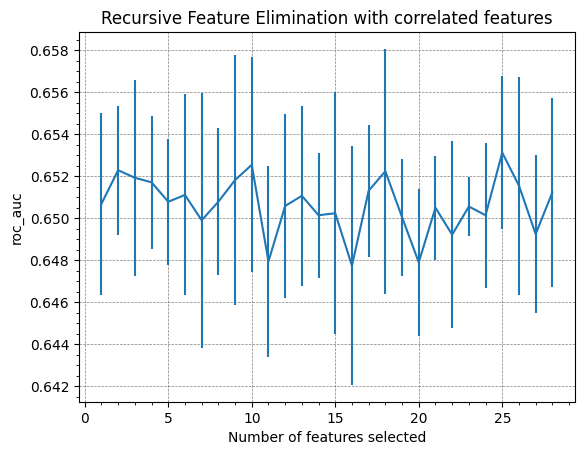

In [ ]:
xb = rfecv.estimator_.named_steps.model
feature_importances = xb.feature_importances_

print('N de features',len(feature_importances))

df_selected = X_train.loc[:,rfecv.support_]
#df_selected = df.drop(columns=['vazao','id_df_linha']).loc[:,rfecv.support_]

df_feature_importances = pd.DataFrame()
df_feature_importances['feature'] = df_selected.columns
df_feature_importances['feature_importance'] = feature_importances.ravel()
df_feature_importances_ordenado = df_feature_importances.sort_values(by='feature_importance',ascending=False).iloc[:22]
#df_feature_importances_ordenado['idx'] = range(22)
df_feature_importances_ordenado = df_feature_importances_ordenado.reset_index()

##################
## Geração dos gráficos
##################
n_scores = len(rfecv.cv_results_["mean_test_score"])
print('n_total_scores:', n_scores)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel(f'{metric}')
plt.errorbar(
    range(1, n_scores + 1),  # Mudei o range para começar de 1, pois os índices começam em 1
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination with correlated features")
# Ative as grades menores
plt.minorticks_on()
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.show()

In [ ]:
df_feature_importances_ordenado

,index,feature,feature_importance
0,2,PAY_1,0.361416
1,3,PAY_2,0.117481
2,5,PAY_4,0.039897
3,4,PAY_3,0.033308
4,26,PAY_AMT_mean,0.026935
5,7,PAY_6,0.026222
6,6,PAY_5,0.025006
7,28,PAY_AMT_min,0.024069
8,32,EDUCATION_4,0.023674
9,22,PAY_min,0.018141


In [ ]:
X_train_selected = rfecv.transform(X_train)
X_test_selected = rfecv.transform(X_test)

# Treine o modelo no conjunto de dados com features selecionadas
pipeline.fit(X_train_selected, y_train)

# Faça previsões de probabilidade no conjunto de teste
probabilities = pipeline.predict_proba(X_test_selected)
probabilities

array([[0.68785447, 0.31214553],
       [0.93026066, 0.06973935],
       [0.84005857, 0.1599414 ],
       ...,
       [0.9393938 , 0.06060616],
       [0.79454577, 0.2054542 ],
       [0.99008405, 0.00991594]], dtype=float32)

,technique,dataframe,brier_score,ks_test,roc_auc
0,pipeline,credit_card_df_cleaning,0.138515,0.407908,0.769338
1,pipeline,credit_card_df_extracting,0.139368,0.396976,0.767222
2,RFE_CV_metric_ks_scorer,credit_card_df_extracting,0.139988,0.398819,0.754164
3,hp_optimization_metric_ks_scorer,credit_card_df_extracting,0.135710,0.415082,0.769167
4,RFE_CV_metric_roc_auc,credit_card_df_extracting,0.139695,0.405328,0.765104


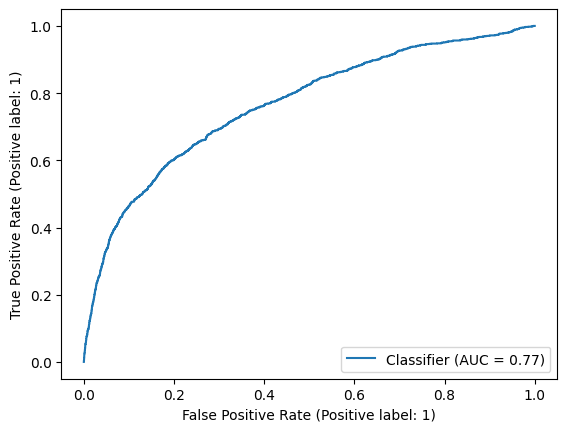

In [ ]:
brier = brier_score_loss(y_test,probabilities[:,1])

roc_auc = roc_auc_score(y_true=y_test,y_score=probabilities[:,1])

# Assuming y_true contains true labels (0 or 1) and y_pred_proba contains predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])

# Calculate KS statistic
ks_statistic = max(tpr - fpr)

RocCurveDisplay.from_predictions(y_test,probabilities[:,1])

results = results.append({'technique': 'RFE_CV_metric_roc_auc' ,'dataframe': 'credit_card_df_extracting', 'brier_score': brier, 'ks_test': ks_statistic, 'roc_auc':roc_auc}, ignore_index=True)
display(results)

In [ ]:
final_probs = probabilities[:,1]
final_df = X_test.copy()
final_df['prob'] = final_probs
final_df['def_payment'] = y_test

final_df

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_range,BILL_range,PAY_AMT_range,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,prob,def_payment
2308,30000.0,25,0,0,0,0,0,0,8864.0,10062.0,...,2000.0,5964.0,500.0,1,0,0,1,0,0.312146,0
22404,150000.0,26,0,0,0,0,0,0,136736.0,125651.0,...,4486.0,59472.0,1839.0,0,0,0,1,0,0.069739,0
23397,70000.0,32,0,0,0,0,0,0,70122.0,69080.0,...,3112.0,1682.0,681.0,0,1,0,0,0,0.159941,0
25058,130000.0,49,0,0,0,0,0,0,20678.0,18956.0,...,7014.0,13734.0,6987.0,0,1,0,1,0,0.077420,0
2664,50000.0,36,0,0,0,0,0,2,94228.0,47635.0,...,2000.0,74789.0,2000.0,1,0,0,1,0,0.115670,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,360000.0,27,1,0,0,0,0,0,0.0,0.0,...,1970.0,1271.0,1970.0,0,0,0,1,0,0.144458,0
14144,500000.0,28,2,0,0,2,0,0,98541.0,102052.0,...,13151.0,33620.0,13151.0,0,0,0,1,0,0.234155,1
23108,60000.0,28,0,0,0,0,0,2,46233.0,47263.0,...,2500.0,6428.0,1000.0,0,0,0,0,0,0.060606,0
25703,20000.0,29,1,0,0,0,0,0,0.0,2494.0,...,3967.0,3967.0,3967.0,0,0,0,1,0,0.205454,0


In [ ]:
final_df[['def_payment','prob']].head(30)

,def_payment,prob
2308,0,0.312146
22404,0,0.069739
23397,0,0.159941
25058,0,0.077420
2664,1,0.115670
8511,0,0.068848
5148,1,0.522154
7790,0,0.326373
11311,0,0.027108
19043,0,0.075851


<Axes: >

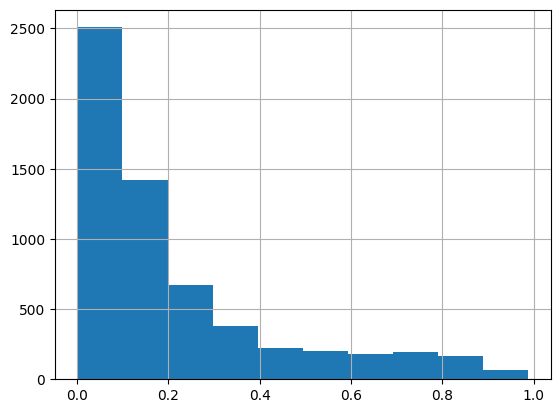

In [ ]:
final_df['prob'].hist()

## 5.7 Predict with Hyperparameter Optimization (metric: feat. selection with roc_auc)

In [ ]:
learning_rate_range = [0.001, 0.01, 0.1]
max_depth_range = [4, 6, 8]
max_leaves_range = [10, 20, 30]
max_bins_range = [128, 256, 512]

param_dict = {
    'model__learning_rate':learning_rate_range,
    'model__max_depth': max_depth_range,
    'model__max_leaves': max_leaves_range,
    'model__max_bins':max_bins_range,
}

GSCV = GridSearchCV(estimator=pipeline,
                    param_grid=param_dict,
                    scoring=ks_scorer)

GSCV.fit(X_train_selected,y_train)
GSCV

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=None,...
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             param_grid={'model__learning_rate': [0.001, 0.01, 0.1],
                         'model__max_bins': [128, 256, 512],
                         'model__max_depth': [4, 6, 8],
                         'model__max_leaves': [10, 20, 30]},
             scoring=make_scorer(ks_stat, needs_proba=True))

In [ ]:
GSCV.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_bins=128,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=4, max_leaves=20,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [ ]:
# previsões de probabilidade no conjunto de teste
final_probabilities = GSCV.predict_proba(X_test_selected)
final_probabilities

array([[0.8264036 , 0.17359641],
       [0.9051557 , 0.0948443 ],
       [0.8839456 , 0.11605444],
       ...,
       [0.8487295 , 0.15127052],
       [0.7648607 , 0.23513931],
       [0.9057063 , 0.09429371]], dtype=float32)

,technique,dataframe,brier_score,ks_test,roc_auc
0,pipeline,credit_card_df_cleaning,0.138515,0.407908,0.769338
1,pipeline,credit_card_df_extracting,0.139368,0.396976,0.767222
2,RFE_CV_metric_ks_scorer,credit_card_df_extracting,0.139988,0.398819,0.754164
3,hp_optimization_metric_ks_scorer,credit_card_df_extracting,0.135710,0.415082,0.769167
4,RFE_CV_metric_roc_auc,credit_card_df_extracting,0.139695,0.405328,0.765104
5,hp_optimization_metric_roc_auc,credit_card_df_extracting,0.133784,0.426087,0.780835


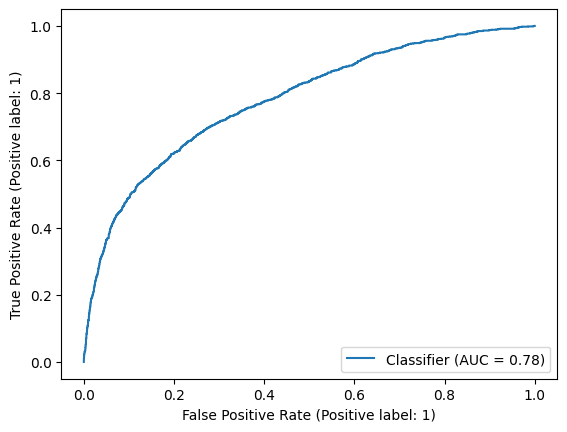

In [ ]:
brier = brier_score_loss(y_test,final_probabilities[:,1])

roc_auc = roc_auc_score(y_true=y_test,y_score=final_probabilities[:,1])

# Assuming y_true contains true labels (0 or 1) and y_pred_proba contains predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, final_probabilities[:,1])

# Calculate KS statistic
ks_statistic = max(tpr - fpr)

RocCurveDisplay.from_predictions(y_test,final_probabilities[:,1])

results = results.append({'technique': f'hp_optimization_metric_{metric}' ,'dataframe': 'credit_card_df_extracting', 'brier_score': brier, 'ks_test': ks_statistic, 'roc_auc':roc_auc}, ignore_index=True)
display(results)

In [ ]:
final_actual_probs = final_probabilities[:,1]
final_actual_df = X_test.copy()
final_actual_df['prob'] = final_actual_probs
final_actual_df['def_payment'] = y_test

final_actual_df

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_range,BILL_range,PAY_AMT_range,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,prob,def_payment
2308,30000.0,25,0,0,0,0,0,0,8864.0,10062.0,...,2000.0,5964.0,500.0,1,0,0,1,0,0.173596,0
22404,150000.0,26,0,0,0,0,0,0,136736.0,125651.0,...,4486.0,59472.0,1839.0,0,0,0,1,0,0.094844,0
23397,70000.0,32,0,0,0,0,0,0,70122.0,69080.0,...,3112.0,1682.0,681.0,0,1,0,0,0,0.116054,0
25058,130000.0,49,0,0,0,0,0,0,20678.0,18956.0,...,7014.0,13734.0,6987.0,0,1,0,1,0,0.098860,0
2664,50000.0,36,0,0,0,0,0,2,94228.0,47635.0,...,2000.0,74789.0,2000.0,1,0,0,1,0,0.187513,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,360000.0,27,1,0,0,0,0,0,0.0,0.0,...,1970.0,1271.0,1970.0,0,0,0,1,0,0.186294,0
14144,500000.0,28,2,0,0,2,0,0,98541.0,102052.0,...,13151.0,33620.0,13151.0,0,0,0,1,0,0.542596,1
23108,60000.0,28,0,0,0,0,0,2,46233.0,47263.0,...,2500.0,6428.0,1000.0,0,0,0,0,0,0.151271,0
25703,20000.0,29,1,0,0,0,0,0,0.0,2494.0,...,3967.0,3967.0,3967.0,0,0,0,1,0,0.235139,0


In [ ]:
final_actual_df[['def_payment','prob']].head(30)

,def_payment,prob
2308,0,0.173596
22404,0,0.094844
23397,0,0.116054
25058,0,0.098860
2664,1,0.187513
8511,0,0.136121
5148,1,0.413029
7790,0,0.318878
11311,0,0.089348
19043,0,0.116342


<Axes: >

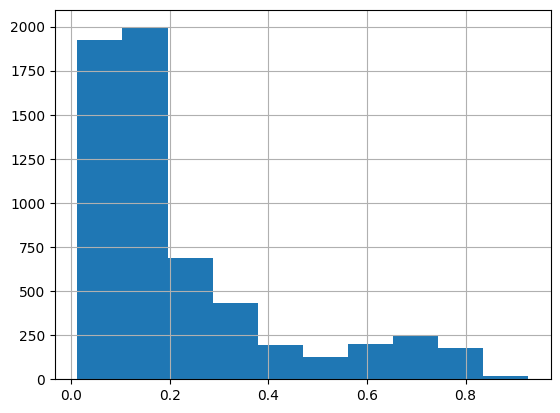

In [ ]:
final_actual_df['prob'].hist()

# padrão RFECV

In [ ]:
# Load the dataframe
df = credit_card_df_extracting.copy()
metric = 'brier'
func_metric = brier_score_loss

def run_rfe_cv(df, metric, func_metric, results):
  # Define metric
  scoring = make_scorer(func_metric)

  # Splitting the dataset into features (X) and target variable (y)
  X = df.drop(columns=['ID','def_payment'], axis=1)
  y = df['def_payment']

  # Splitting the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # pipeline with feature scaling
  pipeline = Pipeline([
      ('scaler', StandardScaler()),  # Add other preprocessing steps as needed
      ('model', xgb.XGBClassifier(objective='binary:logistic', random_state=42))
  ])

  # RFECV with 5-fold cross-validation
  rfecv = RFECV(estimator=pipeline,
                cv=5,
                scoring= scoring,
                importance_getter='named_steps.model.feature_importances_',
                min_features_to_select=10)

  # Fitting RFECV on the training data
  rfecv.fit(X_train, y_train)

  xb = rfecv.estimator_.named_steps.model
  feature_importances = xb.feature_importances_

  print('N features',len(feature_importances))

  df_selected = X_train.loc[:,rfecv.support_]
  # feature importance
  df_feature_importances = pd.DataFrame()
  df_feature_importances['feature'] = df_selected.columns
  df_feature_importances['feature_importance'] = feature_importances.ravel()
  df_feature_importances_ordenado = df_feature_importances.sort_values(by='feature_importance',ascending=False).iloc[:22]
  df_feature_importances_ordenado = df_feature_importances_ordenado.reset_index()

  # graphics
  n_scores = len(rfecv.cv_results_["mean_test_score"])
  print('n_total_scores:', n_scores)

  plt.figure()
  plt.xlabel("Number of features selected")
  plt.ylabel(f'{metric}')
  plt.errorbar(
      range(1, n_scores + 1),
      rfecv.cv_results_["mean_test_score"],
      yerr=rfecv.cv_results_["std_test_score"],
  )
  plt.title("Recursive Feature Elimination with correlated features")
  plt.minorticks_on()
  plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
  plt.show()

  display(df_feature_importances_ordenado.drop(columns=['index']))
  ####
  X_train_selected = rfecv.transform(X_train)
  X_test_selected = rfecv.transform(X_test)

  # Training model with selected features
  pipeline.fit(X_train_selected, y_train)

  # Predict probs on test data
  probabilities = pipeline.predict_proba(X_test_selected)

  brier = brier_score_loss(y_test,probabilities[:,1])
  roc_auc = roc_auc_score(y_true=y_test,y_score=probabilities[:,1])

  # Assuming y_true contains true labels (0 or 1) and y_pred_proba contains predicted probabilities
  fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])

  # Calculate KS statistic
  ks_statistic = max(tpr - fpr)

  RocCurveDisplay.from_predictions(y_test,probabilities[:,1])

  results = results.append({'technique': f'RFE_CV_metric_{metric}' ,'dataframe': 'credit_card_df_extracting', 'brier_score': brier, 'ks_test': ks_statistic, 'roc_auc':roc_auc}, ignore_index=True)
  display(results)

  final_probs = probabilities[:,1]
  final_df = X_test.copy()
  final_df['prob'] = final_probs
  final_df['def_payment'] = y_test

  return results


padrão hp_optimization

In [ ]:
scorer = ks_scorer
def run_hp_optimization(pipeline, scorer,X_test, X_train_selected, y_train):
  learning_rate_range = [0.001, 0.01, 0.1]
  max_depth_range = [4, 6, 8]
  max_leaves_range = [10, 20, 30]
  max_bins_range = [128, 256, 512]

  param_dict = {
      'model__learning_rate':learning_rate_range,
      'model__max_depth': max_depth_range,
      'model__max_leaves': max_leaves_range,
      'model__max_bins':max_bins_range,
  }

  GSCV = GridSearchCV(estimator=pipeline,
                      param_grid=param_dict,
                      scoring=scorer)

  GSCV.fit(X_train_selected,y_train)
  # predict prob on test data
  final_probabilities = GSCV.predict_proba(X_test_selected)
  brier = brier_score_loss(y_test,final_probabilities[:,1])

  # performance metrics
  roc_auc = roc_auc_score(y_true=y_test,y_score=final_probabilities[:,1])

  # Assuming y_true contains true labels (0 or 1) and y_pred_proba contains predicted probabilities
  fpr, tpr, thresholds = roc_curve(y_test, final_probabilities[:,1])

  # Calculate KS statistic
  ks_statistic = max(tpr - fpr)

  RocCurveDisplay.from_predictions(y_test,final_probabilities[:,1])

  results = results.append({'technique': f'hp_optimization_metric_{metric}' ,'dataframe': 'credit_card_df_extracting', 'brier_score': brier, 'ks_test': ks_statistic, 'roc_auc':roc_auc}, ignore_index=True)
  display(results)

  final_actual_probs = final_probabilities[:,1]
  final_actual_df = X_test.copy()
  final_actual_df['prob'] = final_actual_probs
  final_actual_df['def_payment'] = y_test

  return results

In [ ]:
results_old

,technique,dataframe,brier_score,ks_test,roc_auc
0,pipeline,credit_card_df_cleaning,0.138515,0.407908,0.769338
1,pipeline,credit_card_df_extracting,0.139368,0.396976,0.767222
2,RFE_CV_metric_ks_scorer,credit_card_df_extracting,0.139988,0.398819,0.754164
3,hp_optimization_metric_ks_scorer,credit_card_df_extracting,0.135710,0.415082,0.769167
4,RFE_CV_metric_roc_auc,credit_card_df_extracting,0.139695,0.405328,0.765104
5,hp_optimization_metric_roc_auc,credit_card_df_extracting,0.133784,0.426087,0.780835
6,RFE_CV_metric_brier,credit_card_df_extracting,0.139840,0.394118,0.766312
7,hp_optimization_metric_brier,credit_card_df_extracting,0.133809,0.428920,0.782322


In [ ]:
results

,technique,dataframe,brier_score,ks_test,roc_auc


In [ ]:
results = pd.DataFrame(columns=['technique','dataframe','brier_score', 'ks_test', 'roc_auc'])
results

,technique,dataframe,brier_score,ks_test,roc_auc


N features 36
n_total_scores: 28


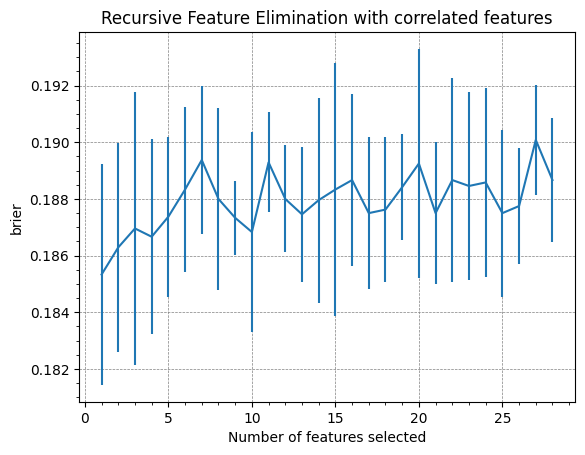

,feature,feature_importance
0,PAY_1,0.361033
1,PAY_2,0.114031
2,PAY_4,0.037617
3,PAY_3,0.035808
4,PAY_6,0.025899
5,PAY_AMT_min,0.023461
6,EDUCATION_4,0.022845
7,PAY_AMT_mean,0.022536
8,PAY_5,0.018640
9,BILL_range,0.015986


,technique,dataframe,brier_score,ks_test,roc_auc
0,RFE_CV_metric_brier,credit_card_df_extracting,0.13984,0.394118,0.766312


,technique,dataframe,brier_score,ks_test,roc_auc
0,RFE_CV_metric_brier,credit_card_df_extracting,0.13984,0.394118,0.766312


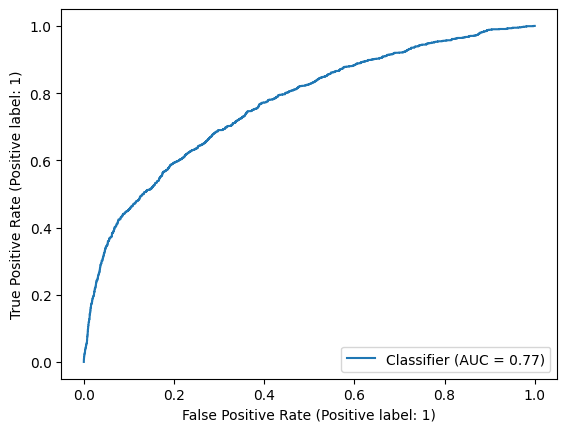

In [ ]:
run_rfe_cv(df, metric, func_metric, results)

## 5.8 Predict with Feature Selection - RFE_CV (metric: brier_score_scorer)

In [ ]:
# Load the dataframe
df = credit_card_df_extracting.copy()

# Define metric
metric = 'brier'
brier_score_scorer = make_scorer(brier_score_loss)#, greater_is_better=False)
scoring = brier_score_scorer

# Splitting the dataset into features (X) and target variable (y)
X = df.drop(columns=['ID','def_payment'], axis=1)
y = df['def_payment']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the pipeline with feature scaling
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Add other preprocessing steps as needed
    ('model', xgb.XGBClassifier(objective='binary:logistic', random_state=42))
])

# Initializing RFECV with 5-fold cross-validation
rfecv = RFECV(estimator=pipeline,
              cv=5,
              scoring= scoring,
              importance_getter='named_steps.model.feature_importances_',
              min_features_to_select=10)

# Fitting RFECV on the training data
rfecv.fit(X_train, y_train)

RFECV(cv=5,
      estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                ('model',
                                 XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None,
                                               feature_types=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               in...
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=None, n_jobs=None,
                                               num_parallel_tree=None,
                                               random_state=42, ...))]),
      importance_getter='named_steps.model.feature_importances_',
      min_features_to_select=10, scoring=make_scorer(brier_score_loss))

N de features 36
n_total_scores: 28


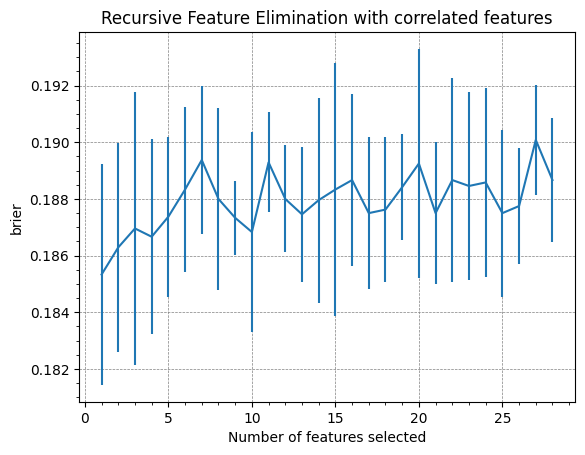

In [ ]:
xb = rfecv.estimator_.named_steps.model
feature_importances = xb.feature_importances_

print('N de features',len(feature_importances))

df_selected = X_train.loc[:,rfecv.support_]
#df_selected = df.drop(columns=['vazao','id_df_linha']).loc[:,rfecv.support_]

df_feature_importances = pd.DataFrame()
df_feature_importances['feature'] = df_selected.columns
df_feature_importances['feature_importance'] = feature_importances.ravel()
df_feature_importances_ordenado = df_feature_importances.sort_values(by='feature_importance',ascending=False).iloc[:22]
#df_feature_importances_ordenado['idx'] = range(22)
df_feature_importances_ordenado = df_feature_importances_ordenado.reset_index()

##################
## Geração dos gráficos
##################
n_scores = len(rfecv.cv_results_["mean_test_score"])
print('n_total_scores:', n_scores)

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel(f'{metric}')
plt.errorbar(
    range(1, n_scores + 1),  # Mudei o range para começar de 1, pois os índices começam em 1
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination with correlated features")
# Ative as grades menores
plt.minorticks_on()
plt.grid(True, linestyle='--', color='gray', linewidth=0.5)
plt.show()

In [ ]:
df_feature_importances_ordenado.drop(columns=['index'])

,feature,feature_importance
0,PAY_1,0.361033
1,PAY_2,0.114031
2,PAY_4,0.037617
3,PAY_3,0.035808
4,PAY_6,0.025899
5,PAY_AMT_min,0.023461
6,EDUCATION_4,0.022845
7,PAY_AMT_mean,0.022536
8,PAY_5,0.018640
9,BILL_range,0.015986


In [ ]:
X_train_selected = rfecv.transform(X_train)
X_test_selected = rfecv.transform(X_test)

# Treine o modelo no conjunto de dados com features selecionadas
pipeline.fit(X_train_selected, y_train)

# Faça previsões de probabilidade no conjunto de teste
probabilities = pipeline.predict_proba(X_test_selected)
probabilities

array([[0.64809006, 0.35190994],
       [0.92800117, 0.07199881],
       [0.79533553, 0.20466445],
       ...,
       [0.8172825 , 0.18271752],
       [0.83937764, 0.16062237],
       [0.9350531 , 0.06494688]], dtype=float32)

,technique,dataframe,brier_score,ks_test,roc_auc
0,pipeline,credit_card_df_cleaning,0.138515,0.407908,0.769338
1,pipeline,credit_card_df_extracting,0.139368,0.396976,0.767222
2,RFE_CV_metric_ks_scorer,credit_card_df_extracting,0.139988,0.398819,0.754164
3,hp_optimization_metric_ks_scorer,credit_card_df_extracting,0.135710,0.415082,0.769167
4,RFE_CV_metric_roc_auc,credit_card_df_extracting,0.139695,0.405328,0.765104
5,hp_optimization_metric_roc_auc,credit_card_df_extracting,0.133784,0.426087,0.780835
6,RFE_CV_metric_brier,credit_card_df_extracting,0.139840,0.394118,0.766312


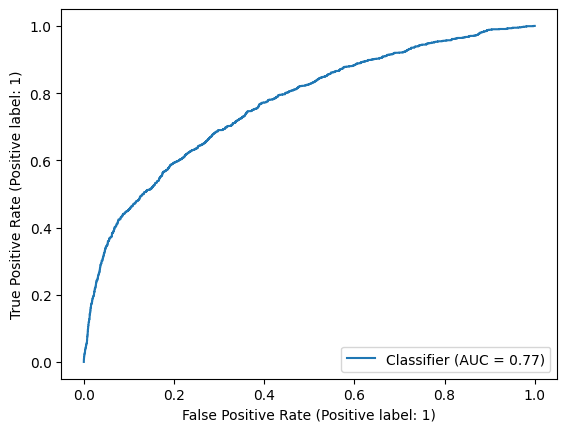

In [ ]:
brier = brier_score_loss(y_test,probabilities[:,1])

roc_auc = roc_auc_score(y_true=y_test,y_score=probabilities[:,1])

# Assuming y_true contains true labels (0 or 1) and y_pred_proba contains predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1])

# Calculate KS statistic
ks_statistic = max(tpr - fpr)

RocCurveDisplay.from_predictions(y_test,probabilities[:,1])

results = results.append({'technique': f'RFE_CV_metric_{metric}' ,'dataframe': 'credit_card_df_extracting', 'brier_score': brier, 'ks_test': ks_statistic, 'roc_auc':roc_auc}, ignore_index=True)
display(results)

In [ ]:
final_probs = probabilities[:,1]
final_df = X_test.copy()
final_df['prob'] = final_probs
final_df['def_payment'] = y_test

final_df

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_range,BILL_range,PAY_AMT_range,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,prob,def_payment
2308,30000.0,25,0,0,0,0,0,0,8864.0,10062.0,...,2000.0,5964.0,500.0,1,0,0,1,0,0.351910,0
22404,150000.0,26,0,0,0,0,0,0,136736.0,125651.0,...,4486.0,59472.0,1839.0,0,0,0,1,0,0.071999,0
23397,70000.0,32,0,0,0,0,0,0,70122.0,69080.0,...,3112.0,1682.0,681.0,0,1,0,0,0,0.204664,0
25058,130000.0,49,0,0,0,0,0,0,20678.0,18956.0,...,7014.0,13734.0,6987.0,0,1,0,1,0,0.035279,0
2664,50000.0,36,0,0,0,0,0,2,94228.0,47635.0,...,2000.0,74789.0,2000.0,1,0,0,1,0,0.137735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,360000.0,27,1,0,0,0,0,0,0.0,0.0,...,1970.0,1271.0,1970.0,0,0,0,1,0,0.221464,0
14144,500000.0,28,2,0,0,2,0,0,98541.0,102052.0,...,13151.0,33620.0,13151.0,0,0,0,1,0,0.517031,1
23108,60000.0,28,0,0,0,0,0,2,46233.0,47263.0,...,2500.0,6428.0,1000.0,0,0,0,0,0,0.182718,0
25703,20000.0,29,1,0,0,0,0,0,0.0,2494.0,...,3967.0,3967.0,3967.0,0,0,0,1,0,0.160622,0


In [ ]:
final_df[['def_payment','prob']].head(30)

,def_payment,prob
2308,0,0.351910
22404,0,0.071999
23397,0,0.204664
25058,0,0.035279
2664,1,0.137735
8511,0,0.118009
5148,1,0.412189
7790,0,0.268621
11311,0,0.031463
19043,0,0.141590


<Axes: >

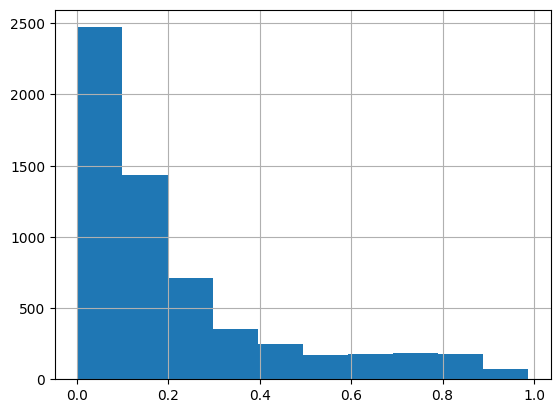

In [ ]:
final_df['prob'].hist()

## 5.9 Predict with Hyperparameter Optimization (metric: feat. selection with brier_score)

In [ ]:
learning_rate_range = [0.001, 0.01, 0.1]
max_depth_range = [4, 6, 8]
max_leaves_range = [10, 20, 30]
max_bins_range = [128, 256, 512]

param_dict = {
    'model__learning_rate':learning_rate_range,
    'model__max_depth': max_depth_range,
    'model__max_leaves': max_leaves_range,
    'model__max_bins':max_bins_range,
}

GSCV = GridSearchCV(estimator=pipeline,
                    param_grid=param_dict,
                    scoring=ks_scorer)

GSCV.fit(X_train_selected,y_train)
GSCV

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=None,...
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             param_grid={'model__learning_rate': [0.001, 0.01, 0.1],
                         'model__max_bins': [128, 256, 512],
                         'model__max_depth': [4, 6, 8],
                         'model__max_leaves': [10, 20, 30]},
             scoring=make_scorer(ks_stat, needs_proba=True))

In [ ]:
GSCV.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_bins=128,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=4, max_leaves=20,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [ ]:
# previsões de probabilidade no conjunto de teste
final_probabilities = GSCV.predict_proba(X_test_selected)
final_probabilities

array([[0.8347147 , 0.16528527],
       [0.90796274, 0.09203725],
       [0.87886643, 0.1211336 ],
       ...,
       [0.8405303 , 0.15946972],
       [0.7826625 , 0.21733749],
       [0.8937059 , 0.10629411]], dtype=float32)

,technique,dataframe,brier_score,ks_test,roc_auc
0,pipeline,credit_card_df_cleaning,0.138515,0.407908,0.769338
1,pipeline,credit_card_df_extracting,0.139368,0.396976,0.767222
2,RFE_CV_metric_ks_scorer,credit_card_df_extracting,0.139988,0.398819,0.754164
3,hp_optimization_metric_ks_scorer,credit_card_df_extracting,0.135710,0.415082,0.769167
4,RFE_CV_metric_roc_auc,credit_card_df_extracting,0.139695,0.405328,0.765104
5,hp_optimization_metric_roc_auc,credit_card_df_extracting,0.133784,0.426087,0.780835
6,RFE_CV_metric_brier,credit_card_df_extracting,0.139840,0.394118,0.766312
7,hp_optimization_metric_brier,credit_card_df_extracting,0.133809,0.428920,0.782322


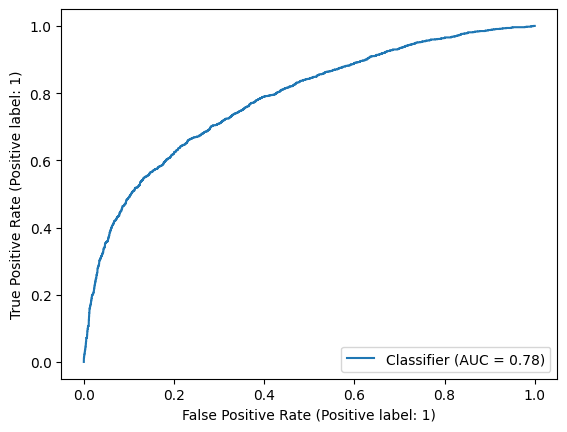

In [ ]:
brier = brier_score_loss(y_test,final_probabilities[:,1])

roc_auc = roc_auc_score(y_true=y_test,y_score=final_probabilities[:,1])

# Assuming y_true contains true labels (0 or 1) and y_pred_proba contains predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, final_probabilities[:,1])

# Calculate KS statistic
ks_statistic = max(tpr - fpr)

RocCurveDisplay.from_predictions(y_test,final_probabilities[:,1])

results = results.append({'technique': f'hp_optimization_metric_{metric}' ,'dataframe': 'credit_card_df_extracting', 'brier_score': brier, 'ks_test': ks_statistic, 'roc_auc':roc_auc}, ignore_index=True)
display(results)

In [ ]:
final_actual_probs = final_probabilities[:,1]
final_actual_df = X_test.copy()
final_actual_df['prob'] = final_actual_probs
final_actual_df['def_payment'] = y_test

final_actual_df

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_range,BILL_range,PAY_AMT_range,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,prob,def_payment
2308,30000.0,25,0,0,0,0,0,0,8864.0,10062.0,...,2000.0,5964.0,500.0,1,0,0,1,0,0.165285,0
22404,150000.0,26,0,0,0,0,0,0,136736.0,125651.0,...,4486.0,59472.0,1839.0,0,0,0,1,0,0.092037,0
23397,70000.0,32,0,0,0,0,0,0,70122.0,69080.0,...,3112.0,1682.0,681.0,0,1,0,0,0,0.121134,0
25058,130000.0,49,0,0,0,0,0,0,20678.0,18956.0,...,7014.0,13734.0,6987.0,0,1,0,1,0,0.095152,0
2664,50000.0,36,0,0,0,0,0,2,94228.0,47635.0,...,2000.0,74789.0,2000.0,1,0,0,1,0,0.184495,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,360000.0,27,1,0,0,0,0,0,0.0,0.0,...,1970.0,1271.0,1970.0,0,0,0,1,0,0.197255,0
14144,500000.0,28,2,0,0,2,0,0,98541.0,102052.0,...,13151.0,33620.0,13151.0,0,0,0,1,0,0.497793,1
23108,60000.0,28,0,0,0,0,0,2,46233.0,47263.0,...,2500.0,6428.0,1000.0,0,0,0,0,0,0.159470,0
25703,20000.0,29,1,0,0,0,0,0,0.0,2494.0,...,3967.0,3967.0,3967.0,0,0,0,1,0,0.217337,0


In [ ]:
final_actual_df[['def_payment','prob']].head(30)

,def_payment,prob
2308,0,0.165285
22404,0,0.092037
23397,0,0.121134
25058,0,0.095152
2664,1,0.184495
8511,0,0.121631
5148,1,0.417576
7790,0,0.324071
11311,0,0.084606
19043,0,0.109927


<Axes: >

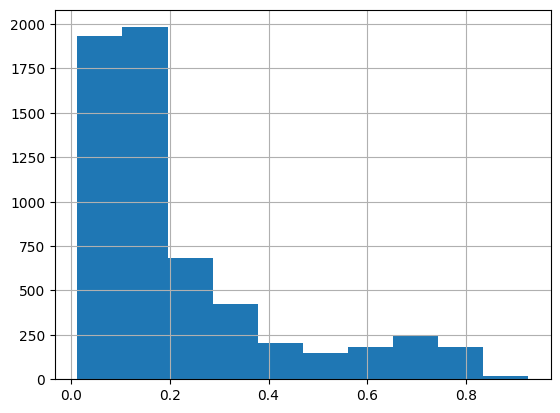

In [ ]:
final_actual_df['prob'].hist()

# 6.0 Avaliação das Probabilidades por Classes

[[Text(0, 0, ''),
  Text(1, 0, ''),
  Text(2, 0, ''),
  Text(3, 0, ''),
  Text(4, 0, ''),
  Text(5, 0, ''),
  Text(6, 0, ''),
  Text(7, 0, '')]]

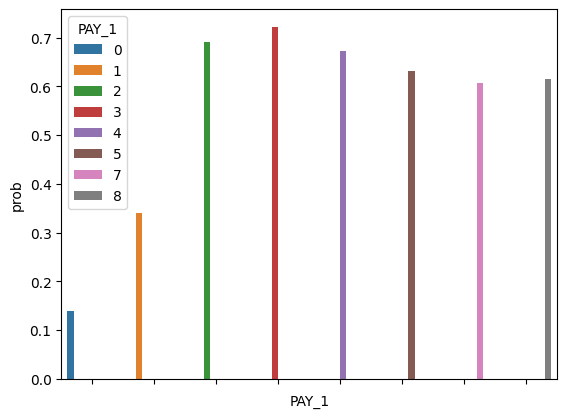

In [ ]:
pay_1 = final_actual_df.groupby('PAY_1',as_index=False)['prob'].mean()

sns.barplot(data=pay_1,x='PAY_1',y='prob',hue='PAY_1').set(xticklabels=[])

<Axes: xlabel='PAY_AMT_min_greater_than_zero', ylabel='prob'>

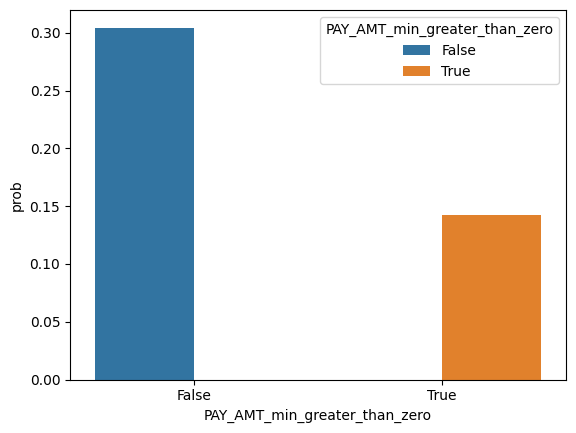

In [ ]:
PAY_AMT_min = final_actual_df.copy()
PAY_AMT_min['PAY_AMT_min_greater_than_zero'] = PAY_AMT_min['PAY_AMT_min'] > 0

PAY_AMT_min = PAY_AMT_min.groupby('PAY_AMT_min_greater_than_zero',as_index=False)['prob'].mean()

sns.barplot(data=PAY_AMT_min,x='PAY_AMT_min_greater_than_zero',y='prob',hue='PAY_AMT_min_greater_than_zero')

<Axes: xlabel='LIMIT_BAL_quantile', ylabel='prob'>

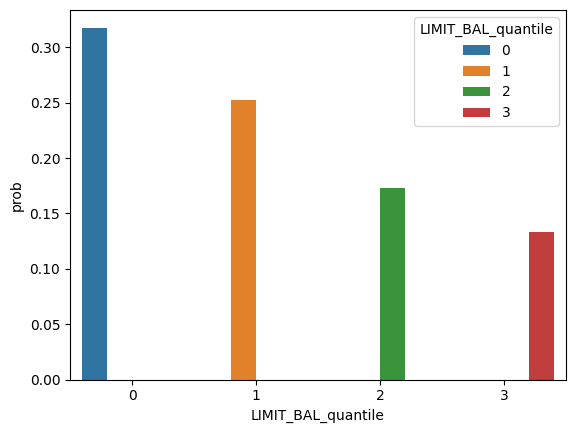

In [ ]:
limit_bal = final_actual_df.copy()

limit_bal['LIMIT_BAL_quantile'] = pd.qcut(limit_bal['LIMIT_BAL'], 4, labels=False)

limit_bal = limit_bal.groupby('LIMIT_BAL_quantile',as_index=False)['prob'].mean()

sns.barplot(data=limit_bal,x='LIMIT_BAL_quantile',y='prob',hue='LIMIT_BAL_quantile')

<Axes: xlabel='BILL_range_quantile', ylabel='prob'>

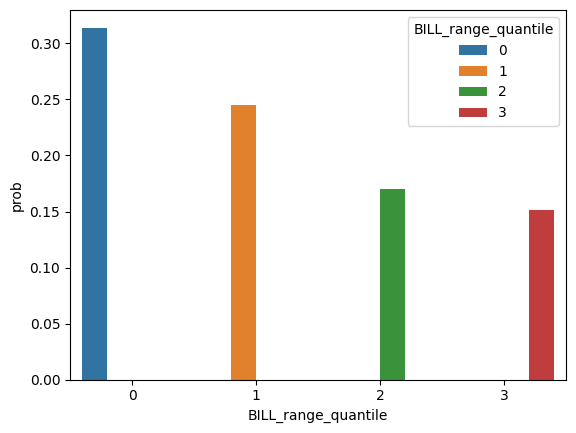

In [ ]:
BILL_range = final_actual_df.copy()

BILL_range['BILL_range_quantile'] = pd.qcut(BILL_range['BILL_range'], 4, labels=False)

BILL_range = BILL_range.groupby('BILL_range_quantile',as_index=False)['prob'].mean()

sns.barplot(data=BILL_range,x=BILL_range['BILL_range_quantile'],y=BILL_range['prob'],hue='BILL_range_quantile')